In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy as scipy
import numpy as np
from varname import nameof
import io
# from src.helper_functions import *
# from src.lookups import *

In [5]:
df = import_all(recession_years)
df['industry_code'] = df['industry_code'].str.replace('31-33','31')
df['industry_code'] = df['industry_code'].str.replace('44-45','44')
df['industry_code'] = df['industry_code'].str.replace('48-49','48').astype('int32')
df = add_qtrid(df)
df_firm = create_df_firm(df)
df_firm = df_firm.reset_index()
df_empl = create_df_empl(df)
df_empl = df_empl.reset_index()
df_wage = create_df_wage(df)
df_wage = df_wage.reset_index()

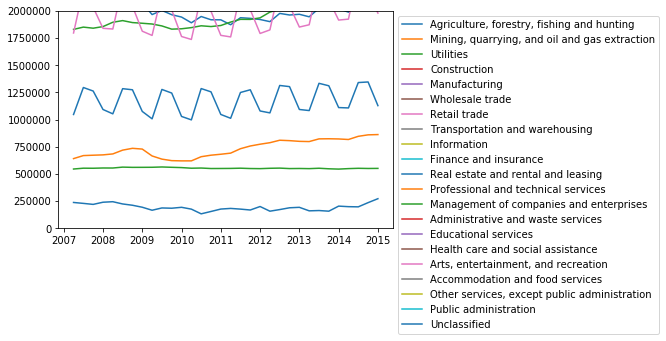

In [6]:
# fig, ax = plt.subplots()
# x = df_firm.columns.values[2:]
# y21 = df_firm[df_firm['industry_code'] == 21].values[0][2:]
# label = df_firm[df_firm['industry_code'] == 21].values[0][1]
# ax.plot(x,y21,label = label)
# y11 = df_firm[df_firm['industry_code'] == 11].values[0][2:]
# label = df_firm[df_firm['industry_code'] == 11].values[0][1]
# ax.plot(x,y11,label = label)
# y22 = df_firm[df_firm['industry_code'] == 22].values[0][2:]
# label = df_firm[df_firm['industry_code'] == 22].values[0][1]
# ax.plot(x,y22,label = label)
# y23 = df_firm[df_firm['industry_code'] == 23].values[0][2:]
# label = df_firm[df_firm['industry_code'] == 23].values[0][1]
# ax.plot(x,y23,label = label)
# y31 = df_firm[df_firm['industry_code'] == 31].values[0][2:]
# label = df_firm[df_firm['industry_code'] == 31].values[0][1]
# ax.plot(x,y31,label = label)
# y42 = df_firm[df_firm['industry_code'] == 42].values[0][2:]
# label = df_firm[df_firm['industry_code'] == 42].values[0][1]
# ax.plot(x,y42,label = label)
# y51 = df_firm[df_firm['industry_code'] == 51].values[0][2:]
# label = df_firm[df_firm['industry_code'] == 51].values[0][1]
# ax.plot(x,y51,label = label)
# y52 = df_firm[df_firm['industry_code'] == 52].values[0][2:]
# label = df_firm[df_firm['industry_code'] == 52].values[0][1]
# ax.plot(x,y52,label = label)
# y53 = df_firm[df_firm['industry_code'] == 53].values[0][2:]
# abel = df_firm[df_firm['industry_code'] == 53].values[0][1]
# ax.plot(x,y53,label = label)
# label = df_firm[df_firm['industry_code'] == 54].values[0][1]
# y54 = df_firm[df_firm['industry_code'] == 54].values[0][2:]
# ax.plot(x,y54,label = label)
# y55 = df_firm[df_firm['industry_code'] == 55].values[0][2:]
# label = df_firm[df_firm['industry_code'] == 55].values[0][1]
# ax.plot(x,y55,label = label)
# y56 = df_firm[df_firm['industry_code'] == 56].values[0][2:]
# label = df_firm[df_firm['industry_code'] == 56].values[0][1]
# ax.plot(x,y56,label = label)
# y44 = df_firm[df_firm['industry_code'] == 11].values[0][2:]
# label = df_firm[df_firm['industry_code'] == 11].values[0][1]
# ax.plot(x,y2,label = label)
# y2 = df_firm[df_firm['industry_code'] == 11].values[0][2:]
# label = df_firm[df_firm['industry_code'] == 11].values[0][1]
# ax.plot(x,y2,label = label)
# y2 = df_firm[df_firm['industry_code'] == 11].values[0][2:]
# label = df_firm[df_firm['industry_code'] == 11].values[0][1]
# ax.plot(x,y2,label = label)

# ax.plot(x,y2,label = label)

# ax.set_xlabel('')
# ax.legend()
# plt.show()

def plot_industries(df, start, stop, scaleend = 1000000):
    fig, ax = plt.subplots()
    x = df.columns.values[2:]
    for indus in range(start, stop):
        if indus in all_industries.keys():
            y = df[df['industry_code'] == indus].values[0][2:]
            label = df[df['industry_code'] == indus].values[0][1]
            ax.plot(x,y,label = label)
    ax.legend(bbox_to_anchor = (1,1), fancybox = True)
    ax.set_ylim(0, scaleend)
    plt.show();
plot_industries(df_empl, 11, 100, 2000000);

In [7]:
def empl_stats(industry_code):
    peak = max(df_empl[df_empl['industry_code'] == industry_code].values[0][2:10])
#    df_temp = (df_empl[df_empl['industry_code'] == industry_code])
#    df_temp = df_temp.drop(['industry_code','industry_title'],axis = 1)
#     peak_qtr = (df_temp == peak).idxmax(axis=1)[0]
#     counter = ((2008 - peak_quarter) * 4) + 1
    for i in df_empl[df_empl['industry_code'] == industry_code].values[0][2:10]:
        if i = peak:
            print
    for i in df_empl[df_empl['industry_code'] == industry_code].values[0][11:]:
        if i > peak:
            qtrs_recover = counter
            return(peak, peak_qtr, qtrs_recover)
        else:
            counter += 1
    return(peak, peak_qtr, 'Did not recover')
    
empl_stats(22)

KeyError: 0

In [23]:
peak = max(df_empl[df_empl['industry_code'] == 22].values[0][2:10])
df_temp = (df_empl[df_empl['industry_code'] == 22])
df_temp = df_temp.drop(['industry_code','industry_title'],axis = 1)
df_temp.reset_index()
(df_temp == peak)
print(df_temp.columns)
for i in df_temp.columns:
    for j in df_temp[0]:
        print(j)


Index([2007.25,  2007.5, 2007.75,  2008.0, 2008.25,  2008.5, 2008.75,  2009.0,
       2009.25,  2009.5, 2009.75,  2010.0, 2010.25,  2010.5, 2010.75,  2011.0,
       2011.25,  2011.5, 2011.75,  2012.0, 2012.25,  2012.5, 2012.75,  2013.0,
       2013.25,  2013.5, 2013.75,  2014.0, 2014.25,  2014.5, 2014.75,  2015.0],
      dtype='object', name='qtrid')


KeyError: 0

In [9]:
peak = max(df_empl[df_empl['industry_code'] == 10].values[0][2:10])
df_temp = (df_empl[df_empl['industry_code'] == 10])
df_temp = df_temp.drop(['industry_code','industry_title'],axis = 1)
(df_temp == peak).idxmax(axis=1)[0]

2008.0

In [535]:
peak

562182.0

In [536]:
df_temp

qtrid,2007.25,2007.50,2007.75,2008.00,2008.25,2008.50,2008.75,2009.00,2009.25,2009.50,...,2012.75,2013.00,2013.25,2013.50,2013.75,2014.00,2014.25,2014.50,2014.75,2015.00
3,544736.0,552277.0,551756.0,554150.0,553895.0,562182.0,560025.0,560243.0,560775.0,563511.0,...,548834.0,549697.0,548274.0,551795.0,546848.0,544005.0,548487.0,551319.0,549730.0,550482.0


In [45]:
def peaks(industry_code):
    empl_peak = max(df_empl[df_empl['industry_code'] == industry_code].values[0][2:10])
    firm_peak = max(df_firm[df_empl['industry_code'] == industry_code].values[0][2:10])
    wage_peak = max(df_wage[df_empl['industry_code'] == industry_code].values[0][2:10])
    return empl_peak, firm_peak, wage_peak

In [47]:
def growth(industry_code):
    empl_peak, firm_peak, wage_peak = peaks(industry_code)
    df_temp = df_empl[df_empl['industry_code'] == industry_code]
    empl_growth = df_temp.iloc[0,33] - empl_peak 
    df_temp = df_firm[df_firm['industry_code'] == industry_code]
    firm_growth = df_temp.iloc[0,33] - firm_peak
    df_temp = df_wage[df_wage['industry_code'] == industry_code]
    wage_growth = df_temp.iloc[0,33] - wage_peak
    return empl_growth, firm_growth, wage_growth
growth(10)

(2225963.0, 331532.0, 72.0)

In [48]:
def create_df_wage(df):
    df_wage = df.pivot_table(columns = 'qtrid', values = 'avg_wkly_wage', index = ['industry_code', 'industry_title'], aggfunc = np.min)
    df_wage = df_wage.reset_index()
    
create_df_wage(df)

SyntaxError: invalid syntax (<ipython-input-48-d2a5692332cc>, line 2)

In [ ]:
()

In [ ]:
#df.set_index('industry_code').join(df_pivoted)


In [ ]:
df_wage.max(axis=1)

In [ ]:
biggest_vals = df_wage.transpose().iloc[0:8,:].max(axis=0)
ending = (df_wage.transpose() > biggest_vals).idxmax()
ending

In [ ]:
biggest_idx = df_wage.T.iloc[0:8,:].idxmax()
biggest_idx

In [ ]:
df_wage.transpose().loc[ending_idx.values].T.values.diagonal()

In [ ]:
requested = pd.DataFrame(np.array([biggest_idx,ending]).T, columns=['peak', 'recover'])

In [ ]:
requested.apply(lambda x: (x['recover'].split('.')[0]-x['peak'].split('.')[0])
                *12+(x.split('.')[1]-y.split('.')[1]))

In [ ]:
years = np.trunc(requested['recover'].values)-np.trunc(requested['peak'].values)

In [ ]:
years

In [ ]:
requested['recover'].values - years

In [ ]:
np.trunc(requested['recover'].values)

In [ ]:
np.trunc(requested['peak'].values)

In [ ]:
quarters = (requested['recover'].values-np.trunc(requested['recover'].values)
            - (requested['peak'].values-np.trunc(requested['peak'].values)))*10

In [ ]:
months  = quarters*3 + years*12

In [ ]:
requested['diff'] = months

In [ ]:
requested

In [50]:
def import_one(year):
    filepath = 'data/' + str(year) + '.csv'
    df = pd.read_csv(filepath, dtype = schema_dict)
    df = df.drop(drop_list, axis = 1)
    return df

def import_all(years):
    df = import_one(years[0])
    for year in years[1:]:
        df = df.append(import_one(year))
    return df

def export_info(df):
    strfile = str(nameof(df)) + '_info.txt'
    buffer = io.StringIO()
    df.info(buf=buffer)
    info = buffer.getvalue()
    with open(strfile, "a", encoding="utf-8") as f: 
        f.write(info)
        f.close
    strfile = str(nameof(df)) + '_desc.csv'
    print(df.describe().to_csv(strfile))
    strfile = str(nameof(df)) + '_freq.csv'
    print(df['industry_title'].value_counts().to_csv(strfile))

def add_qtrid(df):
    df['qtrid'] = df['year'] + (df['qtr']/4)
    return df

def add_dupecheck(df):
    df['industry_code'] = df['industry_code'].str.replace('-','').astype('int32')
    df['dupecheck'] = ((df['industry_code']) * 10000)+ df['qtrid']
    return df

def add_yearcheck(df):
    df['yearcheck'] = ((df['industry_code']) * 10000)+ df['year']
    return df

def create_df_firm(df):
    return df.pivot_table(columns = 'qtrid', values = 'qtrly_estabs_count', index = ['industry_code', 'industry_title'], aggfunc = np.max)
    
def create_df_empl(df):
    return df.pivot_table(columns = 'qtrid', values = 'month3_emplvl', index = ['industry_code', 'industry_title'], aggfunc = np.max)

def create_df_wage(df):
    return df.pivot_table(columns = 'qtrid', values = 'avg_wkly_wage', index = ['industry_code', 'industry_title'], aggfunc = np.min)

In [3]:
schema_dict = { 'area_fips':str,
                'own_code':str,
                'industry_code':str,
                'agglvl_code':str,
                'size_code':str,
                'year':int,
                'qtr':int,
                'disclosure_code':str,
                'area_title':str,
                'own_title':str,
                'industry_title':str,
                'agglvl_title':str,
                'size_title':str,
                'qtrly_estabs':int,
                'month1_emplvl':int,
                'month2_emplvl':int,
                'month3_emplvl':int,
                'total_qtrly_wages':int,
                'taxable_qtrly_wages':int,
                'qtrly_contributions':int,
                'avg_wkly_wage':int,
                'lq_disclosure_code':str,
                'lq_qtrly_estabs':float,
                'lq_month1_emplvl':float,
                'lq_month1_emplv2':float,
                'lq_month1_emplv3':float,
                'lq_total_qtrly_wages':float,
                'lq_taxable_qtrly_wages':float,
                'lq_qrtly_contributions':float,
                'oty_disclosure_code':str,
                'oty_qtrly_estabs':int,
                'oty_qtrly_estabs_pct_chg':float,
                'oty_month1_emplvl_chg':int,
                'oty_month1_emplvl_pct_chg':float,
                'oty_month2_emplv_chg':int,
                'oty_month2_emplvl_pct_chg':float,
                'oty_month3_emplvl_chg':int,
                'oty_month3_emplvl_pct_chg':float,
                'oty_total_qtrly_wages_chg':int,
                'oty_total_qtrly_wages_pct_chg':float,
                'oty_taxable_qtrly_wages_chg':int,
                'oty_taxable_qtrly_wages_pct_chg':float,
                'oty_qrtly_contributions_chg':int,
                'oty_qrtly_contributions_pct_chg':float,
                'oty_avg_wkly_wage_chg':int,
                'oty_avg_wkly_wage_pct_chg':float}

schema_dict_nested = {str:
                ['area_fips',
                'own_code',
                'agglvl_code',
                'size_code',
                'disclosure_code',
                'area_title',
                'own_title',
                'industry_title',
                'agglvl_title',
                'size_title',
                'lq_disclosure_code',
                'oty_disclosure_code'],
                int:
                ['qtrly_estabs',
                'industry_code',
                'month1_emplvl',
                'month2_emplvl',
                'month3_emplvl',
                'total_qtrly_wages',
                'taxable_qtrly_wages',
                'qtrly_contributions',
                'avg_wkly_wage',
                'oty_qtrly_estabs',
                'oty_month1_emplvl_chg',
                'oty_month2_emplv_chg',
                'oty_month3_emplvl_chg',
                'oty_total_qtrly_wages_chg',
                'oty_taxable_qtrly_wages_chg',
                'oty_qrtly_contributions_chg',
                'oty_avg_wkly_wage_chg'],
                float:
                ['lq_qtrly_estabs',
                'lq_month1_emplvl',
                'lq_month1_emplv2',
                'lq_month1_emplv3',
                'lq_total_qtrly_wages',
                'lq_taxable_qtrly_wages',
                'lq_qrtly_contributions',
                'oty_qtrly_estabs_count_chg',
                'oty_qtrly_estabs_count_pct_chg',
                'oty_month1_emplvl_pct_chg',
                'oty_month2_emplvl_pct_chg',
                'oty_month3_emplvl_pct_chg',
                'oty_total_qtrly_wages_pct_chg',
                'oty_taxable_qtrly_wages_pct_chg',
                'oty_qrtly_contributions_pct_chg',
                'oty_avg_wkly_wage_pct_chg']}

drop_list = ['area_fips',
                'own_code',
                'size_code',
                'disclosure_code',
                'area_title',
                'own_title',
                'size_title',
                'lq_disclosure_code',
                'oty_disclosure_code',
                'oty_month1_emplvl_chg',
                'oty_month2_emplvl_chg',
                'oty_month3_emplvl_chg',
                'oty_total_qtrly_wages_chg',
                'oty_taxable_qtrly_wages_chg',
                'oty_qtrly_contributions_chg',
                'oty_avg_wkly_wage_chg',
                'lq_qtrly_estabs_count',
                'lq_month1_emplvl',
                'lq_month2_emplvl',
                'lq_month3_emplvl',
                'lq_total_qtrly_wages',
                'lq_taxable_qtrly_wages',
                'lq_qtrly_contributions',
                'oty_qtrly_estabs_count_chg',
                'oty_qtrly_estabs_count_pct_chg',
                'oty_month1_emplvl_pct',
                'oty_month2_emplvl_pct',
                'oty_month3_emplvl_pct',
                'oty_total_qtrly_wages_pct',
                'oty_taxable_qtrly_wages_chg',
                'oty_qtrly_contributions_pct',
                'oty_avg_wkly_wage_pct',
                'oty_taxable_qtrly_wages_chg.1',
                'lq_avg_wkly_wage',
                'taxable_qtrly_wages',
                'qtrly_contributions']

recession_years = [ '2007',
                    '2008',
                   '2009',
                   '2010',
                   '2011',
                   '2012',
                   '2013',
                   '2014']

columns_list =  ['area_fips',
                'own_code',
                'industry_code',
                'agglvl_code',
                'size_code',
                'year',
                'qtr',
                'disclosure_code',
                'area_title',
                'own_title',
                'industry_title',
                'agglvl_title',
                'size_title',
                'qtrly_estabs',
                'month1_emplvl',
                'month2_emplvl',
                'month3_emplvl',
                'total_qtrly_wages',
                'taxable_qtrly_wages',
                'qtrly_contributions',
                'avg_wkly_wage',
                'lq_disclosure_code',
                'lq_qtrly_estabs',
                'lq_month1_emplvl',
                'lq_month1_emplv2',
                'lq_month1_emplv3',
                'lq_total_qtrly_wages',
                'lq_taxable_qtrly_wages',
                'lq_qrtly_contributions',
                'oty_disclosure_code',
                'oty_qtrly_estabs',
                'oty_qtrly_estabs_pct_chg',
                'oty_month1_emplvl_chg',
                'oty_month1_emplvl_pct_chg',
                'oty_month2_emplv_chg',
                'oty_month2_emplvl_pct_chg',
                'oty_month3_emplvl_chg',
                'oty_month3_emplvl_pct_chg',
                'oty_total_qtrly_wages_chg',
                'oty_total_qtrly_wages_pct_chg',
                'oty_taxable_qtrly_wages_chg',
                'oty_taxable_qtrly_wages_pct_chg',
                'oty_qrtly_contributions_chg',
                'oty_qrtly_contributions_pct_chg',
                'oty_avg_wkly_wage_chg',
                'oty_avg_wkly_wage_pct_chg']

totals_list = {10:'Total, all industries',
              101:'Goods-producing',
              102:'Service-providing'}

all_industries = {10:'Total, all industries',
11:'Agriculture, forestry, fishing and hunting',
21:'Mining, quarrying, and oil and gas extraction',
22:'Utilities',
23:'Construction',
42:'Wholesale trade',
51:'Information',
52:'Finance and insurance',
53:'Real estate and rental and leasing',
54:'Professional and technical services',
55:'Management of companies and enterprises',
56:'Administrative and waste services',
61:'Educational services',
62:'Health care and social assistance',
71:'Arts, entertainment, and recreation',
72:'Accommodation and food services',
81:'Other services, except public administration',
92:'Public administration',
99:'Unclassified',
101:'Goods-producing',
102:'Service-providing',
111:'Crop production',
112:'Animal production and aquaculture',
113:'Forestry and logging',
114:'Fishing, hunting and trapping',
115:'Agriculture and forestry support activities',
211:'Oil and gas extraction',
212:'Mining, except oil and gas',
213:'Support activities for mining',
221:'Utilities',
236:'Construction of buildings',
237:'Heavy and civil engineering construction',
238:'Specialty trade contractors',
311:'Food manufacturing',
312:'Beverage and tobacco product manufacturing',
313:'Textile mills',
314:'Textile product mills',
315:'Apparel manufacturing',
316:'Leather and allied product manufacturing',
321:'Wood product manufacturing',
322:'Paper manufacturing',
323:'Printing and related support activities',
324:'Petroleum and coal products manufacturing',
325:'Chemical manufacturing',
326:'Plastics and rubber products manufacturing',
327:'Nonmetallic mineral product manufacturing',
331:'Primary metal manufacturing',
332:'Fabricated metal product manufacturing',
333:'Machinery manufacturing',
334:'Computer and electronic product manufacturing',
335:'Electrical equipment and appliance mfg.',
336:'Transportation equipment manufacturing',
337:'Furniture and related product manufacturing',
339:'Miscellaneous manufacturing',
423:'Merchant wholesalers, durable goods',
424:'Merchant wholesalers, nondurable goods',
425:'Electronic markets and agents and brokers',
441:'Motor vehicle and parts dealers',
442:'Furniture and home furnishings stores',
443:'Electronics and appliance stores',
444:'Building material and garden supply stores',
445:'Food and beverage stores',
446:'Health and personal care stores',
447:'Gasoline stations',
448:'Clothing and clothing accessories stores',
451:'Sporting goods, hobby, book and music stores',
452:'General merchandise stores',
453:'Miscellaneous store retailers',
454:'Nonstore retailers',
481:'Air transportation',
482:'Rail transportation',
483:'Water transportation',
484:'Truck transportation',
485:'Transit and ground passenger transportation',
486:'Pipeline transportation',
487:'Scenic and sightseeing transportation',
488:'Support activities for transportation',
491:'Postal service',
492:'Couriers and messengers',
493:'Warehousing and storage',
511:'Publishing industries, except internet',
512:'Motion picture and sound recording industries',
515:'Broadcasting, except internet',
517:'Telecommunications',
518:'Data processing, hosting and related services',
519:'Other information services',
521:'Monetary authorities - central bank',
522:'Credit intermediation and related activities',
523:'Securities, commodity contracts, investments',
524:'Insurance carriers and related activities',
525:'Funds, trusts, and other financial vehicles',
531:'Real estate',
532:'Rental and leasing services',
533:'Lessors of nonfinancial intangible assets',
541:'Professional and technical services',
551:'Management of companies and enterprises',
561:'Administrative and support services',
562:'Waste management and remediation services',
611:'Educational services',
621:'Ambulatory health care services',
622:'Hospitals',
623:'Nursing and residential care facilities',
624:'Social assistance',
711:'Performing arts and spectator sports',
712:'Museums, historical sites, zoos, and parks',
713:'Amusements, gambling, and recreation',
721:'Accommodation',
722:'Food services and drinking places',
811:'Repair and maintenance',
812:'Personal and laundry services',
813:'Membership associations and organizations',
814:'Private households',
921:'Executive, legislative and general government',
922:'Justice, public order, and safety activities',
923:'Administration of human resource programs',
924:'Administration of environmental programs',
925:'Community and housing program administration',
926:'Administration of economic programs',
927:'Space research and technology',
928:'National security and international affairs',
999:'Unclassified',
1011:'Natural resources and mining',
1012:'Construction',
1013:'Manufacturing',
1021:'Trade, transportation, and utilities',
1022:'Information',
1023:'Financial activities',
1024:'Professional and business services',
1025:'Education and health services',
1026:'Leisure and hospitality',
1027:'Other services',
1028:'Public administration',
1029:'Unclassified',
1111:'Oilseed and grain farming',
1112:'Vegetable and melon farming',
1113:'Fruit and tree nut farming',
1114:'Greenhouse and nursery production',
1119:'Other crop farming',
1121:'Cattle ranching and farming',
1122:'Hog and pig farming',
1123:'Poultry and egg production',
1124:'Sheep and goat farming',
1125:'Aquaculture',
1129:'Other animal production',
1131:'Timber tract operations',
1132:'Forest nursery and gathering forest products',
1133:'Logging',
1141:'Fishing',
1142:'Hunting and trapping',
1151:'Support activities for crop production',
1152:'Support activities for animal production',
1153:'Support activities for forestry',
2111:'Oil and gas extraction',
2121:'Coal mining',
2122:'Metal ore mining',
2123:'Nonmetallic mineral mining and quarrying',
2131:'Support activities for mining',
2211:'Power generation and supply',
2212:'Natural gas distribution',
2213:'Water, sewage and other systems',
2361:'Residential building construction',
2362:'Nonresidential building construction',
2371:'Utility system construction',
2372:'Land subdivision',
2373:'Highway, street, and bridge construction',
2379:'Other heavy construction',
2381:'Building foundation and exterior contractors',
2382:'Building equipment contractors',
2383:'Building finishing contractors',
2389:'Other specialty trade contractors',
3111:'Animal food manufacturing',
3112:'Grain and oilseed milling',
3113:'Sugar and confectionery product manufacturing',
3114:'Fruit and vegetable preserving and specialty',
3115:'Dairy product manufacturing',
3116:'Animal slaughtering and processing',
3117:'Seafood product preparation and packaging',
3118:'Bakeries and tortilla manufacturing',
3119:'Other food manufacturing',
3121:'Beverage manufacturing',
3122:'Tobacco manufacturing',
3131:'Fiber, yarn, and thread mills',
3132:'Fabric mills',
3133:'Textile and fabric finishing mills',
3141:'Textile furnishings mills',
3149:'Other textile product mills',
3151:'Apparel knitting mills',
3152:'Cut and sew apparel manufacturing',
3159:'Accessories and other apparel manufacturing',
3161:'Leather and hide tanning and finishing',
3162:'Footwear manufacturing',
3169:'Other leather product manufacturing',
3211:'Sawmills and wood preservation',
3212:'Plywood and engineered wood product mfg.',
3219:'Other wood product manufacturing',
3221:'Pulp, paper, and paperboard mills',
3222:'Converted paper product manufacturing',
3231:'Printing and related support activities',
3241:'Petroleum and coal products manufacturing',
3251:'Basic chemical manufacturing',
3252:'Resin, rubber, and artificial fibers mfg.',
3253:'Agricultural chemical manufacturing',
3254:'Pharmaceutical and medicine manufacturing',
3255:'Paint, coating, and adhesive manufacturing',
3256:'Soap, cleaning compound, and toiletry mfg.',
3259:'Other chemical product and preparation mfg.',
3261:'Plastics product manufacturing',
3262:'Rubber product manufacturing',
3271:'Clay product and refractory manufacturing',
3272:'Glass and glass product manufacturing',
3273:'Cement and concrete product manufacturing',
3274:'Lime and gypsum product manufacturing',
3279:'Other nonmetallic mineral products',
3311:'Iron and steel mills and ferroalloy mfg.',
3312:'Steel product mfg. from purchased steel',
3313:'Alumina and aluminum production',
3314:'Other nonferrous metal production',
3315:'Foundries',
3321:'Forging and stamping',
3322:'Cutlery and handtool manufacturing',
3323:'Architectural and structural metals mfg.',
3324:'Boiler, tank, and shipping container mfg.',
3325:'Hardware manufacturing',
3326:'Spring and wire product manufacturing',
3327:'Machine shops and threaded product mfg.',
3328:'Coating, engraving, and heat treating metals',
3329:'Other fabricated metal product manufacturing',
3331:'Ag., construction, and mining machinery mfg.',
3332:'Industrial machinery manufacturing',
3333:'Commercial and service industry machinery',
3334:'Hvac and commercial refrigeration equipment',
3335:'Metalworking machinery manufacturing',
3336:'Turbine and power transmission equipment mfg.',
3339:'Other general purpose machinery manufacturing',
3341:'Computer and peripheral equipment mfg.',
3342:'Communications equipment manufacturing',
3343:'Audio and video equipment manufacturing',
3344:'Semiconductor and electronic component mfg.',
3345:'Electronic instrument manufacturing',
3346:'Magnetic media manufacturing and reproducing',
3351:'Electric lighting equipment manufacturing',
3352:'Household appliance manufacturing',
3353:'Electrical equipment manufacturing',
3359:'Other electrical equipment and component mfg.',
3361:'Motor vehicle manufacturing',
3362:'Motor vehicle body and trailer manufacturing',
3363:'Motor vehicle parts manufacturing',
3364:'Aerospace product and parts manufacturing',
3365:'Railroad rolling stock manufacturing',
3366:'Ship and boat building',
3369:'Other transportation equipment manufacturing',
3371:'Household and institutional furniture mfg.',
3372:'Office furniture and fixtures manufacturing',
3379:'Other furniture related product manufacturing',
3391:'Medical equipment and supplies manufacturing',
3399:'Other miscellaneous manufacturing',
4231:'Motor vehicle and parts merchant wholesalers',
4232:'Furniture and furnishing merchant wholesalers',
4233:'Lumber and const. supply merchant wholesalers',
4234:'Commercial equip. merchant wholesalers',
4235:'Metal and mineral merchant wholesalers',
4236:'Electric goods merchant wholesalers',
4237:'Hardware and plumbing merchant wholesalers',
4238:'Machinery and supply merchant wholesalers',
4239:'Misc. durable goods merchant wholesalers',
4241:'Paper and paper product merchant wholesalers',
4242:'Druggists` goods merchant wholesalers',
4243:'Apparel and piece goods merchant wholesalers',
4244:'Grocery and related product wholesalers',
4245:'Farm product raw material merch. whls.',
4246:'Chemical merchant wholesalers',
4247:'Petroleum merchant wholesalers',
4248:'Alcoholic beverage merchant wholesalers',
4249:'Misc. nondurable goods merchant wholesalers',
4251:'Electronic markets and agents and brokers',
4411:'Automobile dealers',
4412:'Other motor vehicle dealers',
4413:'Auto parts, accessories, and tire stores',
4421:'Furniture stores',
4422:'Home furnishings stores',
4431:'Electronics and appliance stores',
4441:'Building material and supplies dealers',
4442:'Lawn and garden equipment and supplies stores',
4451:'Grocery stores',
4452:'Specialty food stores',
4453:'Beer, wine, and liquor stores',
4461:'Health and personal care stores',
4471:'Gasoline stations',
4481:'Clothing stores',
4482:'Shoe stores',
4483:'Jewelry, luggage, and leather goods stores',
4511:'Sporting goods and musical instrument stores',
4512:'Book, periodical, and music stores',
4521:'Department stores',
4529:'Other general merchandise stores',
4531:'Florists',
4532:'Office supplies, stationery, and gift stores',
4533:'Used merchandise stores',
4539:'Other miscellaneous store retailers',
4541:'Electronic shopping and mail-order houses',
4542:'Vending machine operators',
4543:'Direct selling establishments',
4811:'Scheduled air transportation',
4812:'Nonscheduled air transportation',
4821:'Rail transportation',
4831:'Sea, coastal, and great lakes transportation',
4832:'Inland water transportation',
4841:'General freight trucking',
4842:'Specialized freight trucking',
4851:'Urban transit systems',
4852:'Interurban and rural bus transportation',
4853:'Taxi and limousine service',
4854:'School and employee bus transportation',
4855:'Charter bus industry',
4859:'Other ground passenger transportation',
4861:'Pipeline transportation of crude oil',
4862:'Pipeline transportation of natural gas',
4869:'Other pipeline transportation',
4871:'Scenic and sightseeing transportation, land',
4872:'Scenic and sightseeing transportation, water',
4879:'Scenic and sightseeing transportation, other',
4881:'Support activities for air transportation',
4882:'Support activities for rail transportation',
4883:'Support activities for water transportation',
4884:'Support activities for road transportation',
4885:'Freight transportation arrangement',
4889:'Other support activities for transportation',
4911:'Postal service',
4921:'Couriers and express delivery services',
4922:'Local messengers and local delivery',
4931:'Warehousing and storage',
5111:'Newspaper, book, and directory publishers',
5112:'Software publishers',
5121:'Motion picture and video industries',
5122:'Sound recording industries',
5151:'Radio and television broadcasting',
5152:'Cable and other subscription programming',
5171:'Wired telecommunications carriers',
5172:'Wireless telecommunications carriers',
5174:'Satellite telecommunications',
5179:'Other telecommunications',
5182:'Data processing, hosting and related services',
5191:'Other information services',
5211:'Monetary authorities - central bank',
5221:'Depository credit intermediation',
5222:'Nondepository credit intermediation',
5223:'Activities related to credit intermediation',
5231:'Securities and commodity contracts brokerage',
5232:'Securities and commodity exchanges',
5239:'Other financial investment activities',
5241:'Insurance carriers',
5242:'Insurance agencies and brokerages',
5251:'Insurance and employee benefit funds',
5259:'Other investment pools and funds',
5311:'Lessors of real estate',
5312:'Offices of real estate agents and brokers',
5313:'Activities related to real estate',
5321:'Automotive equipment rental and leasing',
5322:'Consumer goods rental',
5323:'General rental centers',
5324:'Machinery and equipment rental and leasing',
5331:'Lessors of nonfinancial intangible assets',
5411:'Legal services',
5412:'Accounting and bookkeeping services',
5413:'Architectural and engineering services',
5414:'Specialized design services',
5415:'Computer systems design and related services',
5416:'Management and technical consulting services',
5417:'Scientific research and development services',
5418:'Advertising, pr, and related services',
5419:'Other professional and technical services',
5511:'Management of companies and enterprises',
5611:'Office administrative services',
5612:'Facilities support services',
5613:'Employment services',
5614:'Business support services',
5615:'Travel arrangement and reservation services',
5616:'Investigation and security services',
5617:'Services to buildings and dwellings',
5619:'Other support services',
5621:'Waste collection',
5622:'Waste treatment and disposal',
5629:'Remediation and other waste services',
6111:'Elementary and secondary schools',
6112:'Junior colleges',
6113:'Colleges and universities',
6114:'Business, computer and management training',
6115:'Technical and trade schools',
6116:'Other schools and instruction',
6117:'Educational support services',
6211:'Offices of physicians',
6212:'Offices of dentists',
6213:'Offices of other health practitioners',
6214:'Outpatient care centers',
6215:'Medical and diagnostic laboratories',
6216:'Home health care services',
6219:'Other ambulatory health care services',
6221:'General medical and surgical hospitals',
6222:'Psychiatric and substance abuse hospitals',
6223:'Other hospitals',
6231:'Nursing care facilities',
6232:'Residential mental health facilities',
6233:'Community care facilities for the elderly',
6239:'Other residential care facilities',
6241:'Individual and family services',
6242:'Emergency and other relief services',
6243:'Vocational rehabilitation services',
6244:'Child day care services',
7111:'Performing arts companies',
7112:'Spectator sports',
7113:'Promoters of performing arts and sports',
7114:'Agents and managers for public figures',
7115:'Independent artists, writers, and performers',
7121:'Museums, historical sites, zoos, and parks',
7131:'Amusement parks and arcades',
7132:'Gambling industries',
7139:'Other amusement and recreation industries',
7211:'Traveler accommodation',
7212:'Rv parks and recreational camps',
7213:'Rooming and boarding houses',
7221:'Full-service restaurants',
7222:'Limited-service eating places',
7223:'Special food services',
7224:'Drinking places, alcoholic beverages',
7225:'Restaurants',
8111:'Automotive repair and maintenance',
8112:'Electronic equipment repair and maintenance',
8113:'Commercial machinery repair and maintenance',
8114:'Household goods repair and maintenance',
8121:'Personal care services',
8122:'Death care services',
8123:'Drycleaning and laundry services',
8129:'Other personal services',
8131:'Religious organizations',
8132:'Grantmaking and giving services',
8133:'Social advocacy organizations',
8134:'Civic and social organizations',
8139:'Professional and similar organizations',
8141:'Private households',
9211:'Executive, legislative and general government',
9221:'Justice, public order, and safety activities',
9231:'Administration of human resource programs',
9241:'Administration of environmental programs',
9251:'Community and housing program administration',
9261:'Administration of economic programs',
9271:'Space research and technology',
9281:'National security and international affairs',
9999:'Unclassified',
11111:'Soybean farming',
11112:'Oilseed, except soybean, farming',
11113:'Dry pea and bean farming',
11114:'Wheat farming',
11115:'Corn farming',
11116:'Rice farming',
11119:'Other grain farming',
11121:'Vegetable and melon farming',
11131:'Orange groves',
11132:'Citrus, except orange, groves',
11133:'Noncitrus fruit and tree nut farming',
11141:'Food crops grown under cover',
11142:'Nursery and floriculture production',
11191:'Tobacco farming',
11192:'Cotton farming',
11193:'Sugarcane farming',
11194:'Hay farming',
11199:'All other crop farming',
11211:'Beef cattle ranching, farming, and feedlots',
11212:'Dairy cattle and milk production',
11221:'Hog and pig farming',
11231:'Chicken egg production',
11232:'Broilers and meat type chicken production',
11233:'Turkey production',
11234:'Poultry hatcheries',
11239:'Other poultry production',
11241:'Sheep farming',
11242:'Goat farming',
11251:'Aquaculture',
11291:'Apiculture',
11292:'Horses and other equine production',
11293:'Fur-bearing animal and rabbit production',
11299:'All other animal production',
11311:'Timber tract operations',
11321:'Forest nursery and gathering forest products',
11331:'Logging',
11411:'Fishing',
11421:'Hunting and trapping',
11511:'Support activities for crop production',
11521:'Support activities for animal production',
11531:'Support activities for forestry',
21111:'Oil and gas extraction',
21211:'Coal mining',
21221:'Iron ore mining',
21222:'Gold ore and silver ore mining',
21223:'Copper, nickel, lead, and zinc mining',
21229:'Other metal ore mining',
21231:'Stone mining and quarrying',
21232:'Sand, gravel, clay, and refractory mining',
21239:'Other nonmetallic mineral mining',
21311:'Support activities for mining',
22111:'Electric power generation',
22112:'Electric power transmission and distribution',
22121:'Natural gas distribution',
22131:'Water supply and irrigation systems',
22132:'Sewage treatment facilities',
22133:'Steam and air-conditioning supply',
23611:'Residential building construction',
23621:'Industrial building construction',
23622:'Commercial building construction',
23711:'Water and sewer system construction',
23712:'Oil and gas pipeline construction',
23713:'Power and communication system construction',
23721:'Land subdivision',
23731:'Highway, street, and bridge construction',
23799:'Other heavy construction',
23811:'Poured concrete structure contractors',
23812:'Steel and precast concrete contractors',
23813:'Framing contractors',
23814:'Masonry contractors',
23815:'Glass and glazing contractors',
23816:'Roofing contractors',
23817:'Siding contractors',
23819:'Other building exterior contractors',
23821:'Electrical and wiring contractors',
23822:'Plumbing and hvac contractors',
23829:'Other building equipment contractors',
23831:'Drywall and insulation contractors',
23832:'Painting and wall covering contractors',
23833:'Flooring contractors',
23834:'Tile and terrazzo contractors',
23835:'Finish carpentry contractors',
23839:'Other building finishing contractors',
23891:'Site preparation contractors',
23899:'All other specialty trade contractors',
31111:'Animal food manufacturing',
31121:'Flour milling and malt manufacturing',
31122:'Starch and vegetable oil manufacturing',
31123:'Breakfast cereal manufacturing',
31131:'Sugar manufacturing',
31132:'Confectionery manufacturing from cacao beans',
31133:'Confectionery mfg. from purchased chocolate',
31134:'Nonchocolate confectionery manufacturing',
31135:'Confectionery mfg. from cacao or chocolate',
31141:'Frozen food manufacturing',
31142:'Fruit and vegetable canning and drying',
31151:'Dairy product, except frozen, manufacturing',
31152:'Ice cream and frozen dessert manufacturing',
31161:'Animal slaughtering and processing',
31171:'Seafood product preparation and packaging',
31181:'Bread and bakery product manufacturing',
31182:'Cookie, cracker, and pasta manufacturing',
31183:'Tortilla manufacturing',
31191:'Snack food manufacturing',
31192:'Coffee and tea manufacturing',
31193:'Flavoring syrup and concentrate manufacturing',
31194:'Seasoning and dressing manufacturing',
31199:'All other food manufacturing',
31211:'Soft drink and ice manufacturing',
31212:'Breweries',
31213:'Wineries',
31214:'Distilleries',
31221:'Tobacco stemming and redrying',
31222:'Tobacco product manufacturing',
31223:'Tobacco manufacturing',
31311:'Fiber, yarn, and thread mills',
31321:'Broadwoven fabric mills',
31322:'Narrow fabric mills and schiffli embroidery',
31323:'Nonwoven fabric mills',
31324:'Knit fabric mills',
31331:'Textile and fabric finishing mills',
31332:'Fabric coating mills',
31411:'Carpet and rug mills',
31412:'Curtain and linen mills',
31491:'Textile bag and canvas mills',
31499:'All other textile product mills',
31511:'Hosiery and sock mills',
31519:'Other apparel knitting mills',
31521:'Cut and sew apparel contractors',
31522:'Men`s and boys` cut and sew apparel mfg.',
31523:'Women`s and girls` cut and sew apparel mfg',
31524:'Women`s and infants` cut and sew apparel mfg.',
31528:'Other cut and sew apparel manufacturing',
31529:'Other cut and sew apparel manufacturing',
31599:'Accessories and other apparel manufacturing',
31611:'Leather and hide tanning and finishing',
31621:'Footwear manufacturing',
31699:'Other leather product manufacturing',
32111:'Sawmills and wood preservation',
32121:'Plywood and engineered wood product mfg.',
32191:'Millwork',
32192:'Wood container and pallet manufacturing',
32199:'All other wood product manufacturing',
32211:'Pulp mills',
32212:'Paper mills',
32213:'Paperboard mills',
32221:'Paperboard container manufacturing',
32222:'Paper bag and coated and treated paper mfg.',
32223:'Stationery product manufacturing',
32229:'Other converted paper product manufacturing',
32311:'Printing',
32312:'Support activities for printing',
32411:'Petroleum refineries',
32412:'Asphalt paving and roofing materials mfg.',
32419:'Other petroleum and coal products mfg.',
32511:'Petrochemical manufacturing',
32512:'Industrial gas manufacturing',
32513:'Synthetic dye and pigment manufacturing',
32518:'Other basic inorganic chemical manufacturing',
32519:'Other basic organic chemical manufacturing',
32521:'Resin and synthetic rubber manufacturing',
32522:'Artificial fibers and filaments manufacturing',
32531:'Fertilizer manufacturing',
32532:'Pesticide and other ag. chemical mfg.',
32541:'Pharmaceutical and medicine manufacturing',
32551:'Paint and coating manufacturing',
32552:'Adhesive manufacturing',
32561:'Soap and cleaning compound manufacturing',
32562:'Toilet preparation manufacturing',
32591:'Printing ink manufacturing',
32592:'Explosives manufacturing',
32599:'All other chemical preparation manufacturing',
32611:'Plastics packaging materials, film and sheet',
32612:'Plastics pipe, fittings, and profile shapes',
32613:'Laminated plastics plate, sheet, and shapes',
32614:'Polystyrene foam product manufacturing',
32615:'Urethane and other foam product manufacturing',
32616:'Plastics bottle manufacturing',
32619:'Other plastics product manufacturing',
32621:'Tire manufacturing',
32622:'Rubber and plastics hose and belting mfg.',
32629:'Other rubber product manufacturing',
32711:'Pottery, ceramics, and plumbing fixture mfg.',
32712:'Clay building material and refractories mfg.',
32721:'Glass and glass product manufacturing',
32731:'Cement manufacturing',
32732:'Ready-mix concrete manufacturing',
32733:'Concrete pipe, brick, and block manufacturing',
32739:'Other concrete product manufacturing',
32741:'Lime manufacturing',
32742:'Gypsum product manufacturing',
32791:'Abrasive product manufacturing',
32799:'All other nonmetallic mineral products mfg.',
33111:'Iron and steel mills and ferroalloy mfg.',
33121:'Iron, steel pipe and tube from purchase steel',
33122:'Rolling and drawing of purchased steel',
33131:'Alumina and aluminum production',
33141:'Other nonferrous metal production',
33142:'Rolled, drawn, extruded, and alloyed copper',
33149:'Nonferrous metal, except cu and al, shaping',
33151:'Ferrous metal foundries',
33152:'Nonferrous metal foundries',
33211:'Forging and stamping',
33221:'Cutlery and handtool manufacturing',
33231:'Plate work and fabricated structural products',
33232:'Ornamental and architectural metal products',
33241:'Power boiler and heat exchanger manufacturing',
33242:'Metal tank, heavy gauge, manufacturing',
33243:'Metal can, box, and other container mfg.',
33251:'Hardware manufacturing',
33261:'Spring and wire product manufacturing',
33271:'Machine shops',
33272:'Turned product and screw, nut, and bolt mfg.',
33281:'Coating, engraving, and heat treating metals',
33291:'Metal valve manufacturing',
33299:'All other fabricated metal product mfg.',
33311:'Agricultural implement manufacturing',
33312:'Construction machinery manufacturing',
33313:'Mining and oil and gas field machinery mfg.',
33321:'Sawmill and woodworking machinery',
33322:'Plastics and rubber industry machinery',
33324:'Industrial machinery manufacturing',
33329:'Other industrial machinery manufacturing',
33331:'Commercial and service industry machinery',
33341:'Hvac and commercial refrigeration equipment',
33351:'Metalworking machinery manufacturing',
33361:'Turbine and power transmission equipment mfg.',
33391:'Pump and compressor manufacturing',
33392:'Material handling equipment manufacturing',
33399:'All other general purpose machinery mfg.',
33411:'Computer and peripheral equipment mfg.',
33421:'Telephone apparatus manufacturing',
33422:'Broadcast and wireless communications equip.',
33429:'Other communications equipment manufacturing',
33431:'Audio and video equipment manufacturing',
33441:'Semiconductor and electronic component mfg.',
33451:'Electronic instrument manufacturing',
33461:'Magnetic media manufacturing and reproducing',
33511:'Electric lamp bulb and part manufacturing',
33512:'Lighting fixture manufacturing',
33521:'Small electrical appliance manufacturing',
33522:'Major appliance manufacturing',
33531:'Electrical equipment manufacturing',
33591:'Battery manufacturing',
33592:'Communication and energy wire and cable mfg.',
33593:'Wiring device manufacturing',
33599:'Other electrical equipment and component mfg.',
33611:'Automobile and light truck manufacturing',
33612:'Heavy duty truck manufacturing',
33621:'Motor vehicle body and trailer manufacturing',
33631:'Motor vehicle gasoline engine and parts mfg.',
33632:'Motor vehicle electric equipment',
33633:'Motor vehicle steering and suspension parts',
33634:'Motor vehicle brake system manufacturing',
33635:'Motor vehicle power train components mfg.',
33636:'Motor vehicle seating and interior trim mfg.',
33637:'Motor vehicle metal stamping',
33639:'Other motor vehicle parts manufacturing',
33641:'Aerospace product and parts manufacturing',
33651:'Railroad rolling stock manufacturing',
33661:'Ship and boat building',
33699:'Other transportation equipment manufacturing',
33711:'Wood kitchen cabinet and countertop mfg.',
33712:'Other household and institutional furniture',
33721:'Office furniture and fixtures manufacturing',
33791:'Mattress manufacturing',
33792:'Blind and shade manufacturing',
33911:'Medical equipment and supplies manufacturing',
33991:'Jewelry and silverware manufacturing',
33992:'Sporting and athletic goods manufacturing',
33993:'Doll, toy, and game manufacturing',
33994:'Office supplies, except paper, manufacturing',
33995:'Sign manufacturing',
33999:'All other miscellaneous manufacturing',
42311:'Motor vehicle merchant wholesalers',
42312:'New motor vehicle parts merchant wholesalers',
42313:'Tire and tube merchant wholesalers',
42314:'Used motor vehicle parts merchant wholesalers',
42321:'Furniture merchant wholesalers',
42322:'Home furnishing merchant wholesalers',
42331:'Lumber and wood merchant wholesalers',
42332:'Masonry material merchant wholesalers',
42333:'Roofing and siding merchant wholesalers',
42339:'Other const. material merchant wholesalers',
42341:'Photographic equip. merchant wholesalers',
42342:'Office equipment merchant wholesalers',
42343:'Computer and software merchant wholesalers',
42344:'Other commercial equip. merchant wholesalers',
42345:'Medical equipment merchant wholesalers',
42346:'Ophthalmic goods merchant wholesalers',
42349:'Other professional equip. merchant wholesaler',
42351:'Metal merchant wholesalers',
42352:'Coal and other mineral merchant wholesalers',
42361:'Elec. equip. and wiring merchant wholesalers',
42362:'Electric appliance merchant wholesalers',
42369:'Other electronic parts merchant wholesalers',
42371:'Hardware merchant wholesalers',
42372:'Plumbing equip. merchant wholesalers',
42373:'Hvac equip. merchant wholesalers',
42374:'Refrigeration equip. merchant wholesalers',
42381:'Construction equipment merchant wholesalers',
42382:'Farm and garden equip. merchant wholesalers',
42383:'Industrial machinery merchant wholesalers',
42384:'Industrial supplies merchant wholesalers',
42385:'Service estab. equip. merchant wholesalers',
42386:'Other transport. goods merchant wholesalers',
42391:'Sporting goods merchant wholesalers',
42392:'Toy and hobby goods merchant wholesalers',
42393:'Recyclable material merchant wholesalers',
42394:'Jewelry merchant wholesalers',
42399:'All other durable goods merchant wholesalers',
42411:'Printing and writing paper merch. whls.',
42412:'Office supplies merchant wholesalers',
42413:'Industrial paper merchant wholesalers',
42421:'Druggists` goods merchant wholesalers',
42431:'Piece goods merchant wholesalers',
42432:'Men`s and boys` clothing merchant wholesalers',
42433:'Women`s and children`s clothing merch. whls.',
42434:'Footwear merchant wholesalers',
42441:'General line grocery merchant wholesalers',
42442:'Packaged frozen food merchant wholesalers',
42443:'Dairy product merchant wholesalers',
42444:'Poultry product merchant wholesalers',
42445:'Confectionery merchant wholesalers',
42446:'Fish and seafood merchant wholesalers',
42447:'Meat and meat product merchant wholesalers',
42448:'Fruit and vegetable merchant wholesalers',
42449:'Other grocery product merchant wholesalers',
42451:'Grain and field bean merchant wholesalers',
42452:'Livestock merchant wholesalers',
42459:'Other farm product raw material merch. whls.',
42461:'Plastics materials merchant wholesalers',
42469:'Other chemicals merchant wholesalers',
42471:'Petroleum bulk stations and terminals',
42472:'Other petroleum merchant wholesalers',
42481:'Beer and ale merchant wholesalers',
42482:'Wine and spirit merchant wholesalers',
42491:'Farm supplies merchant wholesalers',
42492:'Book and periodical merchant wholesalers',
42493:'Nursery and florist merchant wholesalers',
42494:'Tobacco and tobacco product merch. whls.',
42495:'Paint and supplies merchant wholesalers',
42499:'Other nondurable goods merchant wholesalers',
42511:'Business to business electronic markets',
42512:'Wholesale trade agents and brokers',
44111:'New car dealers',
44112:'Used car dealers',
44121:'Recreational vehicle dealers',
44122:'Motorcycle, boat, and other vehicle dealers',
44131:'Automotive parts and accessories stores',
44132:'Tire dealers',
44211:'Furniture stores',
44221:'Floor covering stores',
44229:'Other home furnishings stores',
44311:'Appliance, tv, and other electronics stores',
44312:'Computer and software stores',
44313:'Camera and photographic supplies stores',
44314:'Electronics and appliances stores',
44411:'Home centers',
44412:'Paint and wallpaper stores',
44413:'Hardware stores',
44419:'Other building material dealers',
44421:'Outdoor power equipment stores',
44422:'Nursery, garden, and farm supply stores',
44511:'Supermarkets and other grocery stores',
44512:'Convenience stores',
44521:'Meat markets',
44522:'Fish and seafood markets',
44523:'Fruit and vegetable markets',
44529:'Other specialty food stores',
44531:'Beer, wine, and liquor stores',
44611:'Pharmacies and drug stores',
44612:'Cosmetic and beauty supply stores',
44613:'Optical goods stores',
44619:'Other health and personal care stores',
44711:'Gasoline stations with convenience stores',
44719:'Other gasoline stations',
44811:'Men`s clothing stores',
44812:'Women`s clothing stores',
44813:'Children`s and infants` clothing stores',
44814:'Family clothing stores',
44815:'Clothing accessories stores',
44819:'Other clothing stores',
44821:'Shoe stores',
44831:'Jewelry stores',
44832:'Luggage and leather goods stores',
45111:'Sporting goods stores',
45112:'Hobby, toy, and game stores',
45113:'Sewing, needlework, and piece goods stores',
45114:'Musical instrument and supplies stores',
45121:'Book stores and news dealers',
45122:'Precorded tape, cd, and record stores',
45211:'Department stores',
45291:'Warehouse clubs and supercenters',
45299:'All other general merchandise stores',
45311:'Florists',
45321:'Office supplies and stationery stores',
45322:'Gift, novelty, and souvenir stores',
45331:'Used merchandise stores',
45391:'Pet and pet supplies stores',
45392:'Art dealers',
45393:'Manufactured, mobile, home dealers',
45399:'All other miscellaneous store retailers',
45411:'Electronic shopping and mail-order houses',
45421:'Vending machine operators',
45431:'Fuel dealers',
45439:'Other direct selling establishments',
48111:'Scheduled air transportation',
48121:'Nonscheduled air transportation',
48211:'Rail transportation',
48311:'Sea, coastal, and great lakes transportation',
48321:'Inland water transportation',
48411:'General freight trucking, local',
48412:'General freight trucking, long-distance',
48421:'Used household and office goods moving',
48422:'Other specialized trucking, local',
48423:'Other specialized trucking, long-distance',
48511:'Urban transit systems',
48521:'Interurban and rural bus transportation',
48531:'Taxi service',
48532:'Limousine service',
48541:'School and employee bus transportation',
48551:'Charter bus industry',
48599:'Other ground passenger transportation',
48611:'Pipeline transportation of crude oil',
48621:'Pipeline transportation of natural gas',
48691:'Refined petroleum product pipeline transport.',
48699:'All other pipeline transportation',
48711:'Scenic and sightseeing transportation, land',
48721:'Scenic and sightseeing transportation, water',
48799:'Scenic and sightseeing transportation, other',
48811:'Airport operations',
48819:'Other support activities for air transport.',
48821:'Support activities for rail transportation',
48831:'Port and harbor operations',
48832:'Marine cargo handling',
48833:'Navigational services to shipping',
48839:'Other support activities for water transport.',
48841:'Motor vehicle towing',
48849:'Other support activities for road transport.',
48851:'Freight transportation arrangement',
48899:'Other support activities for transportation',
49111:'Postal service',
49211:'Couriers and express delivery services',
49221:'Local messengers and local delivery',
49311:'General warehousing and storage',
49312:'Refrigerated warehousing and storage',
49313:'Farm product warehousing and storage',
49319:'Other warehousing and storage',
51111:'Newspaper publishers',
51112:'Periodical publishers',
51113:'Book publishers',
51114:'Directory and mailing list publishers',
51119:'Other publishers',
51121:'Software publishers',
51211:'Motion picture and video production',
51212:'Motion picture and video distribution',
51213:'Motion picture and video exhibition',
51219:'Postproduction and other related industries',
51221:'Record production',
51222:'Integrated record production and distribution',
51223:'Music publishers',
51224:'Sound recording studios',
51229:'Other sound recording industries',
51511:'Radio broadcasting',
51512:'Television broadcasting',
51521:'Cable and other subscription programming',
51711:'Wired telecommunications carriers',
51721:'Wireless telecommunications carriers',
51741:'Satellite telecommunications',
51791:'Other telecommunications',
51821:'Data processing and related services',
51911:'News syndicates',
51912:'Libraries and archives',
51913:'Internet publishing and web search portals',
51919:'All other information services',
52111:'Monetary authorities - central bank',
52211:'Commercial banking',
52212:'Savings institutions',
52213:'Credit unions',
52219:'Other depository credit intermediation',
52221:'Credit card issuing',
52222:'Sales financing',
52229:'Other nondepository credit intermediation',
52231:'Mortgage and nonmortgage loan brokers',
52232:'Financial transaction processing and clearing',
52239:'Other credit intermediation activities',
52311:'Investment banking and securities dealing',
52312:'Securities brokerage',
52313:'Commodity contracts dealing',
52314:'Commodity contracts brokerage',
52321:'Securities and commodity exchanges',
52391:'Miscellaneous intermediation',
52392:'Portfolio management',
52393:'Investment advice',
52399:'All other financial investment activities',
52411:'Direct life and health insurance carriers',
52412:'Direct insurers, except life and health',
52413:'Reinsurance carriers',
52421:'Insurance agencies and brokerages',
52429:'Other insurance related activities',
52511:'Pension funds',
52512:'Health and welfare funds',
52519:'Other insurance funds',
52591:'Open-end investment funds',
52592:'Trusts, estates, and agency accounts',
52599:'Other financial vehicles',
53111:'Lessors of residential buildings',
53112:'Lessors of nonresidential buildings',
53113:'Miniwarehouse and self-storage unit operators',
53119:'Lessors of other real estate property',
53121:'Offices of real estate agents and brokers',
53131:'Real estate property managers',
53132:'Offices of real estate appraisers',
53139:'Other activities related to real estate',
53211:'Passenger car rental and leasing',
53212:'Truck, trailer, and rv rental and leasing',
53221:'Consumer electronics and appliances rental',
53222:'Formal wear and costume rental',
53223:'Video tape and disc rental',
53229:'Other consumer goods rental',
53231:'General rental centers',
53241:'Heavy machinery rental and leasing',
53242:'Office equipment rental and leasing',
53249:'Other machinery rental and leasing',
53311:'Lessors of nonfinancial intangible assets',
54111:'Offices of lawyers',
54119:'Other legal services',
54121:'Accounting and bookkeeping services',
54131:'Architectural services',
54132:'Landscape architectural services',
54133:'Engineering services',
54134:'Drafting services',
54135:'Building inspection services',
54136:'Geophysical surveying and mapping services',
54137:'Other surveying and mapping services',
54138:'Testing laboratories',
54141:'Interior design services',
54142:'Industrial design services',
54143:'Graphic design services',
54149:'Other specialized design services',
54151:'Computer systems design and related services',
54161:'Management consulting services',
54162:'Environmental consulting services',
54169:'Other technical consulting services',
54171:'Physical, engineering and biological research',
54172:'Social science and humanities research',
54181:'Advertising agencies',
54182:'Public relations agencies',
54183:'Media buying agencies',
54184:'Media representatives',
54185:'Outdoor advertising',
54186:'Direct mail advertising',
54187:'Advertising material distribution services',
54189:'Other services related to advertising',
54191:'Marketing research and public opinion polling',
54192:'Photographic services',
54193:'Translation and interpretation services',
54194:'Veterinary services',
54199:'All other professional and technical services',
55111:'Management of companies and enterprises',
56111:'Office administrative services',
56121:'Facilities support services',
56131:'Employment placement and executive search',
56132:'Temporary help services',
56133:'Professional employer organizations',
56141:'Document preparation services',
56142:'Telephone call centers',
56143:'Business service centers',
56144:'Collection agencies',
56145:'Credit bureaus',
56149:'Other business support services',
56151:'Travel agencies',
56152:'Tour operators',
56159:'Other travel arrangement services',
56161:'Security and armored car services',
56162:'Security systems services',
56171:'Exterminating and pest control services',
56172:'Janitorial services',
56173:'Landscaping services',
56174:'Carpet and upholstery cleaning services',
56179:'Other services to buildings and dwellings',
56191:'Packaging and labeling services',
56192:'Convention and trade show organizers',
56199:'All other support services',
56211:'Waste collection',
56221:'Waste treatment and disposal',
56291:'Remediation services',
56292:'Materials recovery facilities',
56299:'All other waste management services',
61111:'Elementary and secondary schools',
61121:'Junior colleges',
61131:'Colleges and universities',
61141:'Business and secretarial schools',
61142:'Computer training',
61143:'Management training',
61151:'Technical and trade schools',
61161:'Fine arts schools',
61162:'Sports and recreation instruction',
61163:'Language schools',
61169:'All other schools and instruction',
61171:'Educational support services',
62111:'Offices of physicians',
62121:'Offices of dentists',
62131:'Offices of chiropractors',
62132:'Offices of optometrists',
62133:'Offices of mental health practitioners',
62134:'Offices of specialty therapists',
62139:'Offices of all other health practitioners',
62141:'Family planning centers',
62142:'Outpatient mental health centers',
62149:'Other outpatient care centers',
62151:'Medical and diagnostic laboratories',
62161:'Home health care services',
62191:'Ambulance services',
62199:'All other ambulatory health care services',
62211:'General medical and surgical hospitals',
62221:'Psychiatric and substance abuse hospitals',
62231:'Other hospitals',
62311:'Nursing care facilities',
62321:'Residential disability facilities',
62322:'Residential mental and substance abuse care',
62331:'Community care facilities for the elderly',
62399:'Other residential care facilities',
62411:'Child and youth services',
62412:'Services for the elderly and disabled',
62419:'Other individual and family services',
62421:'Community food services',
62422:'Community housing services',
62423:'Emergency and other relief services',
62431:'Vocational rehabilitation services',
62441:'Child day care services',
71111:'Theater companies and dinner theaters',
71112:'Dance companies',
71113:'Musical groups and artists',
71119:'Other performing arts companies',
71121:'Spectator sports',
71131:'Promoters with facilities',
71132:'Promoters without facilities',
71141:'Agents and managers for public figures',
71151:'Independent artists, writers, and performers',
71211:'Museums',
71212:'Historical sites',
71213:'Zoos and botanical gardens',
71219:'Nature parks and other similar institutions',
71311:'Amusement and theme parks',
71312:'Amusement arcades',
71321:'Casinos, except casino hotels',
71329:'Other gambling industries',
71391:'Golf courses and country clubs',
71392:'Skiing facilities',
71393:'Marinas',
71394:'Fitness and recreational sports centers',
71395:'Bowling centers',
71399:'All other amusement and recreation industries',
72111:'Hotels and motels, except casino hotels',
72112:'Casino hotels',
72119:'Other traveler accommodation',
72121:'Rv parks and recreational camps',
72131:'Rooming and boarding houses',
72211:'Full-service restaurants',
72221:'Limited-service eating places',
72231:'Food service contractors',
72232:'Caterers',
72233:'Mobile food services',
72241:'Drinking places, alcoholic beverages',
72251:'Restaurants',
81111:'Automotive mechanical and electrical repair',
81112:'Automotive body, interior, and glass repair',
81119:'Other automotive repair and maintenance',
81121:'Electronic equipment repair and maintenance',
81131:'Commercial machinery repair and maintenance',
81141:'Home and garden equip. and appliance repair',
81142:'Reupholstery and furniture repair',
81143:'Footwear and leather goods repair',
81149:'Other household goods repair and maintenance',
81211:'Hair, nail, and skin care services',
81219:'Other personal care services',
81221:'Funeral homes and funeral services',
81222:'Cemeteries and crematories',
81231:'Coin-operated laundries and drycleaners',
81232:'Drycleaning and laundry services',
81233:'Linen and uniform supply',
81291:'Pet care, except veterinary, services',
81292:'Photofinishing',
81293:'Parking lots and garages',
81299:'All other personal services',
81311:'Religious organizations',
81321:'Grantmaking and giving services',
81331:'Social advocacy organizations',
81341:'Civic and social organizations',
81391:'Business associations',
81392:'Professional organizations',
81393:'Labor unions and similar labor organizations',
81394:'Political organizations',
81399:'Other similar organizations',
81411:'Private households',
92111:'Executive offices',
92112:'Legislative bodies',
92113:'Public finance activities',
92114:'Executive and legislative offices, combined',
92115:'Tribal governments',
92119:'Other general government support',
92211:'Courts',
92212:'Police protection',
92213:'Legal counsel and prosecution',
92214:'Correctional institutions',
92215:'Parole offices and probation offices',
92216:'Fire protection',
92219:'Other justice and safety activities',
92311:'Administration of education programs',
92312:'Administration of public health programs',
92313:'Other human resource programs administration',
92314:'Administration of veterans` affairs',
92411:'Air, water, and waste program administration',
92412:'Administration of conservation programs',
92511:'Administration of housing programs',
92512:'Urban and rural development administration',
92611:'Administration of general economic programs',
92612:'Transportation program administration',
92613:'Utility regulation and administration',
92614:'Agricultural market and commodity regulation',
92615:'Licensing and regulating commercial sectors',
92711:'Space research and technology',
92811:'National security',
92812:'International affairs',
99999:'Unclassified',
111110:'Soybean farming',
111120:'Oilseed, except soybean, farming',
111130:'Dry pea and bean farming',
111140:'Wheat farming',
111150:'Corn farming',
111160:'Rice farming',
111191:'Oilseed and grain combination farming',
111199:'All other grain farming',
111211:'Potato farming',
111219:'Other vegetable and melon farming',
111310:'Orange groves',
111320:'Citrus, except orange, groves',
111331:'Apple orchards',
111332:'Grape vineyards',
111333:'Strawberry farming',
111334:'Berry, except strawberry, farming',
111335:'Tree nut farming',
111336:'Fruit and tree nut combination farming',
111339:'Other noncitrus fruit farming',
111411:'Mushroom production',
111419:'Other food crops grown under cover',
111421:'Nursery and tree production',
111422:'Floriculture production',
111910:'Tobacco farming',
111920:'Cotton farming',
111930:'Sugarcane farming',
111940:'Hay farming',
111991:'Sugar beet farming',
111992:'Peanut farming',
111998:'All other miscellaneous crop farming',
112111:'Beef cattle ranching and farming',
112112:'Cattle feedlots',
112120:'Dairy cattle and milk production',
112210:'Hog and pig farming',
112310:'Chicken egg production',
112320:'Broilers and meat type chicken production',
112330:'Turkey production',
112340:'Poultry hatcheries',
112390:'Other poultry production',
112410:'Sheep farming',
112420:'Goat farming',
112511:'Finfish farming and fish hatcheries',
112512:'Shellfish farming',
112519:'Other aquaculture',
112910:'Apiculture',
112920:'Horses and other equine production',
112930:'Fur-bearing animal and rabbit production',
112990:'All other animal production',
113110:'Timber tract operations',
113210:'Forest nursery and gathering forest products',
113310:'Logging',
114111:'Finfish fishing',
114112:'Shellfish fishing',
114119:'Other marine fishing',
114210:'Hunting and trapping',
115111:'Cotton ginning',
115112:'Soil preparation, planting, and cultivating',
115113:'Crop harvesting, primarily by machine',
115114:'Other postharvest crop activities',
115115:'Farm labor contractors and crew leaders',
115116:'Farm management services',
115210:'Support activities for animal production',
115310:'Support activities for forestry',
211111:'Crude petroleum and natural gas extraction',
211112:'Natural gas liquid extraction',
212111:'Bituminous coal and lignite surface mining',
212112:'Bituminous coal underground mining',
212113:'Anthracite mining',
212210:'Iron ore mining',
212221:'Gold ore mining',
212222:'Silver ore mining',
212231:'Lead ore and zinc ore mining',
212234:'Copper ore and nickel ore mining',
212291:'Uranium-radium-vanadium ore mining',
212299:'All other metal ore mining',
212311:'Dimension stone mining and quarrying',
212312:'Crushed and broken limestone mining',
212313:'Crushed and broken granite mining',
212319:'Other crushed and broken stone mining',
212321:'Construction sand and gravel mining',
212322:'Industrial sand mining',
212324:'Kaolin and ball clay mining',
212325:'Clay, ceramic, and refractory minerals mining',
212391:'Potash, soda, and borate mineral mining',
212392:'Phosphate rock mining',
212393:'Other chemical and fertilizer mineral mining',
212399:'All other nonmetallic mineral mining',
213111:'Drilling oil and gas wells',
213112:'Support activities for oil and gas operations',
213113:'Support activities for coal mining',
213114:'Support activities for metal mining',
213115:'Support activities for nonmetallic minerals',
221111:'Hydroelectric power generation',
221112:'Fossil fuel electric power generation',
221113:'Nuclear electric power generation',
221114:'Solar electric power generation',
221115:'Wind electric power generation',
221116:'Geothermal electric power generation',
221117:'Biomass electric power generation',
221118:'Other electric power generation',
221119:'Other electric power generation',
221121:'Electric bulk power transmission and control',
221122:'Electric power distribution',
221210:'Natural gas distribution',
221310:'Water supply and irrigation systems',
221320:'Sewage treatment facilities',
221330:'Steam and air-conditioning supply',
236115:'New single-family general contractors',
236116:'New multifamily general contractors',
236117:'New housing for-sale builders',
236118:'Residential remodelers',
236210:'Industrial building construction',
236220:'Commercial building construction',
237110:'Water and sewer system construction',
237120:'Oil and gas pipeline construction',
237130:'Power and communication system construction',
237210:'Land subdivision',
237310:'Highway, street, and bridge construction',
237990:'Other heavy construction',
238111:'Residential poured foundation contractors',
238112:'Nonresidential poured foundation contractors',
238121:'Residential structural steel contractors',
238122:'Nonresidential structural steel contractors',
238131:'Residential framing contractors',
238132:'Nonresidential framing contractors',
238141:'Residential masonry contractors',
238142:'Nonresidential masonry contractors',
238151:'Residential glass and glazing contractors',
238152:'Nonresidential glass and glazing contractors',
238161:'Residential roofing contractors',
238162:'Nonresidential roofing contractors',
238171:'Residential siding contractors',
238172:'Nonresidential siding contractors',
238191:'Other residential exterior contractors',
238192:'Other nonresidential exterior contractors',
238211:'Residential electrical contractors',
238212:'Nonresidential electrical contractors',
238221:'Residential plumbing and hvac contractors',
238222:'Nonresidential plumbing and hvac contractors',
238291:'Other residential equipment contractors',
238292:'Other nonresidential equipment contractors',
238311:'Residential drywall contractors',
238312:'Nonresidential drywall contractors',
238321:'Residential painting contractors',
238322:'Nonresidential painting contractors',
238331:'Residential flooring contractors',
238332:'Nonresidential flooring contractors',
238341:'Residential tile and terrazzo contractors',
238342:'Nonresidential tile and terrazzo contractors',
238351:'Residential finish carpentry contractors',
238352:'Nonresidential finish carpentry contractors',
238391:'Other residential finishing contractors',
238392:'Other nonresidential finishing contractors',
238911:'Residential site preparation contractors',
238912:'Nonresidential site preparation contractors',
238991:'All other residential trade contractors',
238992:'All other nonresidential trade contractors',
311111:'Dog and cat food manufacturing',
311119:'Other animal food manufacturing',
311211:'Flour milling',
311212:'Rice milling',
311213:'Malt manufacturing',
311221:'Wet corn milling',
311222:'Soybean processing',
311223:'Other oilseed processing',
311224:'Soybean and other oilseed processing',
311225:'Fats and oils refining and blending',
311230:'Breakfast cereal manufacturing',
311311:'Sugarcane mills',
311312:'Cane sugar refining',
311313:'Beet sugar manufacturing',
311314:'Cane sugar manufacturing',
311320:'Confectionery manufacturing from cacao beans',
311330:'Confectionery mfg. from purchased chocolate',
311340:'Nonchocolate confectionery manufacturing',
311351:'Confectionery manufacturing from cacao beans',
311352:'Confectionery mfg. from purchased chocolate',
311411:'Frozen fruit and vegetable manufacturing',
311412:'Frozen specialty food manufacturing',
311421:'Fruit and vegetable canning',
311422:'Specialty canning',
311423:'Dried and dehydrated food manufacturing',
311511:'Fluid milk manufacturing',
311512:'Creamery butter manufacturing',
311513:'Cheese manufacturing',
311514:'Dry, condensed, and evaporated dairy products',
311520:'Ice cream and frozen dessert manufacturing',
311611:'Animal, except poultry, slaughtering',
311612:'Meat processed from carcasses',
311613:'Rendering and meat byproduct processing',
311615:'Poultry processing',
311710:'Seafood product preparation and packaging',
311711:'Seafood canning',
311712:'Fresh and frozen seafood processing',
311811:'Retail bakeries',
311812:'Commercial bakeries',
311813:'Frozen cakes and other pastries manufacturing',
311821:'Cookie and cracker manufacturing',
311822:'Mixes and dough made from purchased flour',
311823:'Dry pasta manufacturing',
311824:'Dry pasta and mixes from purchased flour',
311830:'Tortilla manufacturing',
311911:'Roasted nuts and peanut butter manufacturing',
311919:'Other snack food manufacturing',
311920:'Coffee and tea manufacturing',
311930:'Flavoring syrup and concentrate manufacturing',
311941:'Mayonnaise, dressing, and sauce manufacturing',
311942:'Spice and extract manufacturing',
311991:'Perishable prepared food manufacturing',
311999:'All other miscellaneous food manufacturing',
312111:'Soft drink manufacturing',
312112:'Bottled water manufacturing',
312113:'Ice manufacturing',
312120:'Breweries',
312130:'Wineries',
312140:'Distilleries',
312210:'Tobacco stemming and redrying',
312221:'Cigarette manufacturing',
312229:'Other tobacco product manufacturing',
312230:'Tobacco manufacturing',
313110:'Fiber, yarn, and thread mills',
313111:'Yarn spinning mills',
313112:'Yarn texturizing and twisting mills',
313113:'Thread mills',
313210:'Broadwoven fabric mills',
313220:'Narrow fabric mills and schiffli machine emb.',
313221:'Narrow fabric mills',
313222:'Schiffli machine embroidery',
313230:'Nonwoven fabric mills',
313240:'Knit fabric mills',
313241:'Weft knit fabric mills',
313249:'Other knit fabric and lace mills',
313310:'Textile and fabric finishing mills',
313311:'Broadwoven fabric finishing mills',
313312:'Other textile and fabric finishing mills',
313320:'Fabric coating mills',
314110:'Carpet and rug mills',
314120:'Curtain and linen mills',
314121:'Curtain and drapery mills',
314129:'Other household textile product mills',
314910:'Textile bag and canvas mills',
314911:'Textile bag mills',
314912:'Canvas and related product mills',
314991:'Rope, cordage, and twine mills',
314992:'Tire cord and tire fabric mills',
314994:'Rope, cordage, twine, and tire fabric mills',
314999:'All other miscellaneous textile product mills',
315110:'Hosiery and sock mills',
315111:'Sheer hosiery mills',
315119:'Other hosiery and sock mills',
315190:'Other apparel knitting mills',
315191:'Outerwear knitting mills',
315192:'Underwear and nightwear knitting mills',
315210:'Cut and sew apparel contractors',
315211:'Men`s and boys` apparel contractors',
315212:'Women`s, girls`, infants` apparel contractors',
315220:'Men`s and boys` cut and sew apparel mfg.',
315221:'Men`s and boys` underwear and nightwear mfg',
315222:'Men`s and boys` suit, coat, and overcoat mfg',
315223:'Men`s and boys` shirt, except work shirt, mfg',
315224:'Men`s and boys` pants, except work pants, mfg',
315225:'Men`s and boys` work clothing manufacturing',
315228:'Other men`s and boys` outerwear manufacturing',
315231:'Women`s and girls` lingerie and nightwear mfg',
315232:'Women`s and girls` blouse and shirt mfg',
315233:'Women`s and girls` dress manufacturing',
315234:'Women`s and girls` suit, coat, and skirt mfg',
315239:'Other women`s and girls` outerwear mfg',
315240:'Women`s cut and sew apparel manufacturing',
315280:'Other cut and sew apparel manufacturing',
315291:'Infants` cut and sew apparel manufacturing',
315292:'Fur and leather apparel manufacturing',
315299:'All other cut and sew apparel manufacturing',
315990:'Apparel accessories and other apparel mfg.',
315991:'Hat, cap, and millinery manufacturing',
315992:'Glove and mitten manufacturing',
315993:'Men`s and boys` neckwear manufacturing',
315999:'All other accessory and apparel manufacturing',
316110:'Leather and hide tanning and finishing',
316210:'Footwear manufacturing',
316211:'Rubber and plastics footwear manufacturing',
316212:'House slipper manufacturing',
316213:'Men`s nonathletic footwear manufacturing',
316214:'Women`s nonathletic footwear manufacturing',
316219:'Other footwear manufacturing',
316991:'Luggage manufacturing',
316992:'Women`s handbag and purse manufacturing',
316993:'Other personal leather good manufacturing',
316998:'Other leather good and allied product mfg.',
316999:'All other leather and allied good mfg.',
321113:'Sawmills',
321114:'Wood preservation',
321211:'Hardwood veneer and plywood manufacturing',
321212:'Softwood veneer and plywood manufacturing',
321213:'Engineered wood member manufacturing',
321214:'Truss manufacturing',
321219:'Reconstituted wood product manufacturing',
321911:'Wood window and door manufacturing',
321912:'Cut stock, resawing lumber, and planing',
321918:'Other millwork, including flooring',
321920:'Wood container and pallet manufacturing',
321991:'Manufactured home, mobile home, manufacturing',
321992:'Prefabricated wood building manufacturing',
321999:'All other miscellaneous wood product mfg.',
322110:'Pulp mills',
322121:'Paper, except newsprint, mills',
322122:'Newsprint mills',
322130:'Paperboard mills',
322211:'Corrugated and solid fiber box manufacturing',
322212:'Folding paperboard box manufacturing',
322213:'Setup paperboard box manufacturing',
322214:'Fiber can, tube, and drum manufacturing',
322215:'Nonfolding sanitary food container mfg.',
322219:'Other paperboard container manufacturing',
322220:'Paper bag and coated and treated paper mfg.',
322221:'Coated and laminated packaging paper mfg.',
322222:'Coated and laminated paper manufacturing',
322223:'Coated paper bag and pouch manufacturing',
322224:'Uncoated paper and multiwall bag mfg.',
322225:'Flexible packaging foil manufacturing',
322226:'Surface-coated paperboard manufacturing',
322230:'Stationery product manufacturing',
322231:'Die-cut paper office supplies manufacturing',
322232:'Envelope manufacturing',
322233:'Stationery and related product manufacturing',
322291:'Sanitary paper product manufacturing',
322299:'All other converted paper product mfg.',
323110:'Commercial lithographic printing',
323111:'Commercial printing (exc. screen and books)',
323112:'Commercial flexographic printing',
323113:'Commercial screen printing',
323114:'Quick printing',
323115:'Digital printing',
323116:'Manifold business forms printing',
323117:'Books printing',
323118:'Blankbook and looseleaf binder manufacturing',
323119:'Other commercial printing',
323120:'Support activities for printing',
323121:'Tradebinding and related work',
323122:'Prepress services',
324110:'Petroleum refineries',
324121:'Asphalt paving mixture and block mfg.',
324122:'Asphalt shingle and coating materials mfg.',
324191:'Petroleum lubricating oil and grease mfg.',
324199:'All other petroleum and coal products mfg.',
325110:'Petrochemical manufacturing',
325120:'Industrial gas manufacturing',
325130:'Synthetic dye and pigment manufacturing',
325131:'Inorganic dye and pigment manufacturing',
325132:'Synthetic organic dye and pigment mfg.',
325180:'Other basic inorganic chemical manufacturing',
325181:'Alkalies and chlorine manufacturing',
325182:'Carbon black manufacturing',
325188:'All other basic inorganic chemical mfg.',
325191:'Gum and wood chemical manufacturing',
325192:'Cyclic crude and intermediate manufacturing',
325193:'Ethyl alcohol manufacturing',
325194:'Cyclic crude, and gum and wood chemical mfg.',
325199:'All other basic organic chemical mfg.',
325211:'Plastics material and resin manufacturing',
325212:'Synthetic rubber manufacturing',
325220:'Artificial and synthetic fibers manufacturing',
325221:'Cellulosic organic fiber manufacturing',
325222:'Noncellulosic organic fiber manufacturing',
325311:'Nitrogenous fertilizer manufacturing',
325312:'Phosphatic fertilizer manufacturing',
325314:'Fertilizer, mixing only, manufacturing',
325320:'Pesticide and other ag. chemical mfg.',
325411:'Medicinal and botanical manufacturing',
325412:'Pharmaceutical preparation manufacturing',
325413:'In-vitro diagnostic substance manufacturing',
325414:'Other biological product manufacturing',
325510:'Paint and coating manufacturing',
325520:'Adhesive manufacturing',
325611:'Soap and other detergent manufacturing',
325612:'Polish and other sanitation good mfg.',
325613:'Surface active agent manufacturing',
325620:'Toilet preparation manufacturing',
325910:'Printing ink manufacturing',
325920:'Explosives manufacturing',
325991:'Custom compounding of purchased resins',
325992:'Photographic film and chemical manufacturing',
325998:'Other miscellaneous chemical product mfg.',
326111:'Plastics bag and pouch manufacturing',
326112:'Plastics packaging film and sheet mfg.',
326113:'Nonpackaging plastics film and sheet mfg.',
326121:'Unlaminated plastics profile shape mfg.',
326122:'Plastics pipe and pipe fitting manufacturing',
326130:'Laminated plastics plate, sheet, and shapes',
326140:'Polystyrene foam product manufacturing',
326150:'Urethane and other foam product manufacturing',
326160:'Plastics bottle manufacturing',
326191:'Plastics plumbing fixture manufacturing',
326192:'Resilient floor covering manufacturing',
326199:'All other plastics product manufacturing',
326211:'Tire manufacturing, except retreading',
326212:'Tire retreading',
326220:'Rubber and plastics hose and belting mfg.',
326291:'Rubber product mfg. for mechanical use',
326299:'All other rubber product manufacturing',
327110:'Pottery, ceramics, and plumbing fixture mfg.',
327111:'Vitreous china plumbing fixture manufacturing',
327112:'Vitreous china and earthenware articles mfg.',
327113:'Porcelain electrical supply manufacturing',
327120:'Clay building material and refractories mfg.',
327121:'Brick and structural clay tile manufacturing',
327122:'Ceramic wall and floor tile manufacturing',
327123:'Other structural clay product manufacturing',
327124:'Clay refractory manufacturing',
327125:'Nonclay refractory manufacturing',
327211:'Flat glass manufacturing',
327212:'Other pressed and blown glass and glassware',
327213:'Glass container manufacturing',
327215:'Glass product mfg. made of purchased glass',
327310:'Cement manufacturing',
327320:'Ready-mix concrete manufacturing',
327331:'Concrete block and brick manufacturing',
327332:'Concrete pipe manufacturing',
327390:'Other concrete product manufacturing',
327410:'Lime manufacturing',
327420:'Gypsum product manufacturing',
327910:'Abrasive product manufacturing',
327991:'Cut stone and stone product manufacturing',
327992:'Ground or treated minerals and earths mfg.',
327993:'Mineral wool manufacturing',
327999:'Miscellaneous nonmetallic mineral products',
331110:'Iron and steel mills and ferroalloy mfg.',
331111:'Iron and steel mills',
331112:'Ferroalloy and related product manufacturing',
331210:'Iron, steel pipe and tube from purchase steel',
331221:'Rolled steel shape manufacturing',
331222:'Steel wire drawing',
331311:'Alumina refining',
331312:'Primary aluminum production',
331313:'Primary production of alumina and aluminum',
331314:'Secondary smelting and alloying of aluminum',
331315:'Aluminum sheet, plate, and foil manufacturing',
331316:'Aluminum extruded product manufacturing',
331318:'Other al rolling, drawing, and extruding',
331319:'Other aluminum rolling and drawing',
331410:'Nonferrous (exc. al) smelting and refining',
331411:'Primary smelting and refining of copper',
331419:'Primary nonferrous metal, except cu and al',
331420:'Cu rolling, drawing, extruding, and alloying',
331421:'Copper rolling, drawing, and extruding',
331422:'Copper wire, except mechanical, drawing',
331423:'Secondary processing of copper',
331491:'Nonferrous metal, except cu and al, shaping',
331492:'Secondary processing of other nonferrous',
331511:'Iron foundries',
331512:'Steel investment foundries',
331513:'Steel foundries, except investment',
331521:'Aluminum die-casting foundries',
331522:'Nonferrous, except al, die-casting foundries',
331523:'Nonferrous metal die-casting foundries',
331524:'Aluminum foundries, except die-casting',
331525:'Copper foundries, except die-casting',
331528:'Other nonferrous foundries, exc. die-casting',
331529:'Other nonferrous foundries, exc. die-casting',
332111:'Iron and steel forging',
332112:'Nonferrous forging',
332114:'Custom roll forming',
332115:'Crown and closure manufacturing',
332116:'Metal stamping',
332117:'Powder metallurgy part manufacturing',
332119:'Metal crown and other stamping, exc. auto',
332211:'Cutlery and flatware, except precious, mfg.',
332212:'Hand and edge tool manufacturing',
332213:'Saw blade and handsaw manufacturing',
332214:'Kitchen utensil, pot, and pan manufacturing',
332215:'Cutlery, flatware and kitchen utensil mfg.',
332216:'Saw blade and handtool manufacturing',
332311:'Prefabricated metal buildings and components',
332312:'Fabricated structural metal manufacturing',
332313:'Plate work manufacturing',
332321:'Metal window and door manufacturing',
332322:'Sheet metal work manufacturing',
332323:'Ornamental and architectural metal work mfg.',
332410:'Power boiler and heat exchanger manufacturing',
332420:'Metal tank, heavy gauge, manufacturing',
332431:'Metal can manufacturing',
332439:'Other metal container manufacturing',
332510:'Hardware manufacturing',
332611:'Spring, heavy gauge, manufacturing',
332612:'Spring, light gauge, manufacturing',
332613:'Spring manufacturing',
332618:'Other fabricated wire product manufacturing',
332710:'Machine shops',
332721:'Precision turned product manufacturing',
332722:'Bolt, nut, screw, rivet, and washer mfg.',
332811:'Metal heat treating',
332812:'Metal coating and nonprecious engraving',
332813:'Electroplating, anodizing, and coloring metal',
332911:'Industrial valve manufacturing',
332912:'Fluid power valve and hose fitting mfg.',
332913:'Plumbing fixture fitting and trim mfg.',
332919:'Other metal valve and pipe fitting mfg.',
332991:'Ball and roller bearing manufacturing',
332992:'Small arms ammunition manufacturing',
332993:'Ammunition, except small arms, manufacturing',
332994:'Small arms, ordnance, and accessories mfg.',
332995:'Other ordnance and accessories manufacturing',
332996:'Fabricated pipe and pipe fitting mfg.',
332997:'Industrial pattern manufacturing',
332998:'Enameled iron and metal sanitary ware mfg.',
332999:'Miscellaneous fabricated metal product mfg.',
333111:'Farm machinery and equipment manufacturing',
333112:'Lawn and garden equipment manufacturing',
333120:'Construction machinery manufacturing',
333131:'Mining machinery and equipment manufacturing',
333132:'Oil and gas field machinery and equipment',
333210:'Sawmill and woodworking machinery',
333220:'Plastics and rubber industry machinery',
333241:'Food product machinery manufacturing',
333242:'Semiconductor machinery manufacturing',
333243:'Sawmill, woodworking, and paper machinery mfg',
333244:'Printing machinery and equipment mfg.',
333249:'Other industrial machinery manufacturing',
333291:'Paper industry machinery manufacturing',
333292:'Textile machinery manufacturing',
333293:'Printing machinery and equipment mfg.',
333294:'Food product machinery manufacturing',
333295:'Semiconductor machinery manufacturing',
333298:'All other industrial machinery manufacturing',
333311:'Automatic vending machine manufacturing',
333312:'Commercial laundry and drycleaning machinery',
333313:'Office machinery manufacturing',
333314:'Optical instrument and lens manufacturing',
333315:'Photographic and photocopying equipment mfg.',
333316:'Photographic and photocopying equipment mfg.',
333318:'Other industry machinery manufacturing',
333319:'Other commercial and service machinery mfg.',
333411:'Air purification equipment manufacturing',
333412:'Industrial and commercial fan and blower mfg.',
333413:'Air purification, fan and blower equip. mfg.',
333414:'Heating equipment, except warm air furnaces',
333415:'Ac, refrigeration, and forced air heating',
333511:'Industrial mold manufacturing',
333512:'Metal cutting machine tool manufacturing',
333513:'Metal forming machine tool manufacturing',
333514:'Special tool, die, jig, and fixture mfg.',
333515:'Cutting tool and machine tool accessory mfg.',
333516:'Rolling mill machinery and equipment mfg.',
333517:'Machine tool manufacturing',
333518:'Other metalworking machinery manufacturing',
333519:'Rolling mill and other machinery mfg.',
333611:'Turbine and turbine generator set units mfg.',
333612:'Speed changer, drive, and gear manufacturing',
333613:'Mechanical power transmission equipment mfg.',
333618:'Other engine equipment manufacturing',
333911:'Pump and pumping equipment manufacturing',
333912:'Air and gas compressor manufacturing',
333913:'Measuring and dispensing pump manufacturing',
333921:'Elevator and moving stairway manufacturing',
333922:'Conveyor and conveying equipment mfg.',
333923:'Overhead cranes, hoists, and monorail systems',
333924:'Industrial truck, trailer, and stacker mfg.',
333991:'Power-driven handtool manufacturing',
333992:'Welding and soldering equipment manufacturing',
333993:'Packaging machinery manufacturing',
333994:'Industrial process furnace and oven mfg.',
333995:'Fluid power cylinder and actuator mfg.',
333996:'Fluid power pump and motor manufacturing',
333997:'Scale and balance manufacturing',
333999:'Miscellaneous general purpose machinery mfg.',
334111:'Electronic computer manufacturing',
334112:'Computer storage device manufacturing',
334113:'Computer terminal manufacturing',
334118:'Computer terminal and peripheral equip. mfg.',
334119:'Other computer peripheral equipment mfg.',
334210:'Telephone apparatus manufacturing',
334220:'Broadcast and wireless communications equip.',
334290:'Other communications equipment manufacturing',
334310:'Audio and video equipment manufacturing',
334411:'Electron tube manufacturing',
334412:'Bare printed circuit board manufacturing',
334413:'Semiconductors and related device mfg.',
334414:'Electronic capacitor manufacturing',
334415:'Electronic resistor manufacturing',
334416:'Capacitor, transformer, and inductor mfg.',
334417:'Electronic connector manufacturing',
334418:'Printed circuit assembly manufacturing',
334419:'Other electronic component manufacturing',
334510:'Electromedical apparatus manufacturing',
334511:'Search, detection, and navigation instruments',
334512:'Automatic environmental control manufacturing',
334513:'Industrial process variable instruments',
334514:'Totalizing fluid meters and counting devices',
334515:'Electricity and signal testing instruments',
334516:'Analytical laboratory instrument mfg.',
334517:'Irradiation apparatus manufacturing',
334518:'Watch, clock, and part manufacturing',
334519:'Other measuring and controlling device mfg.',
334611:'Software reproducing',
334612:'Audio and video media reproduction',
334613:'Magnetic and optical recording media mfg.',
334614:'Software and other prerecorded reproducing',
335110:'Electric lamp bulb and part manufacturing',
335121:'Residential electric lighting fixture mfg.',
335122:'Nonresidential electric lighting fixture mfg.',
335129:'Other lighting equipment manufacturing',
335210:'Small electrical appliance manufacturing',
335211:'Electric housewares and household fan mfg.',
335212:'Household vacuum cleaner manufacturing',
335221:'Household cooking appliance manufacturing',
335222:'Household refrigerator and home freezer mfg.',
335224:'Household laundry equipment manufacturing',
335228:'Other major household appliance manufacturing',
335311:'Electric power and specialty transformer mfg.',
335312:'Motor and generator manufacturing',
335313:'Switchgear and switchboard apparatus mfg.',
335314:'Relay and industrial control manufacturing',
335911:'Storage battery manufacturing',
335912:'Primary battery manufacturing',
335921:'Fiber optic cable manufacturing',
335929:'Other communication and energy wire mfg.',
335931:'Current-carrying wiring device manufacturing',
335932:'Noncurrent-carrying wiring device mfg.',
335991:'Carbon and graphite product manufacturing',
335999:'Miscellaneous electrical equipment mfg.',
336111:'Automobile manufacturing',
336112:'Light truck and utility vehicle manufacturing',
336120:'Heavy duty truck manufacturing',
336211:'Motor vehicle body manufacturing',
336212:'Truck trailer manufacturing',
336213:'Motor home manufacturing',
336214:'Travel trailer and camper manufacturing',
336310:'Motor vehicle gasoline engine and parts mfg.',
336311:'Carburetor, piston, ring, and valve mfg.',
336312:'Gasoline engine and engine parts mfg.',
336320:'Motor vehicle electrical and equipment mfg.',
336321:'Vehicular lighting equipment manufacturing',
336322:'Other motor vehicle electric equipment mfg.',
336330:'Motor vehicle steering and suspension parts',
336340:'Motor vehicle brake system manufacturing',
336350:'Motor vehicle power train components mfg.',
336360:'Motor vehicle seating and interior trim mfg.',
336370:'Motor vehicle metal stamping',
336390:'Other motor vehicle parts manufacturing',
336391:'Motor vehicle air-conditioning manufacturing',
336399:'All other motor vehicle parts manufacturing',
336411:'Aircraft manufacturing',
336412:'Aircraft engine and engine parts mfg.',
336413:'Other aircraft parts and equipment',
336414:'Guided missile and space vehicle mfg.',
336415:'Space vehicle propulsion units and parts mfg.',
336419:'Other guided missile and space vehicle parts',
336510:'Railroad rolling stock manufacturing',
336611:'Ship building and repairing',
336612:'Boat building',
336991:'Motorcycle, bicycle, and parts manufacturing',
336992:'Military armored vehicles and tank parts mfg.',
336999:'All other transportation equipment mfg.',
337110:'Wood kitchen cabinet and countertop mfg.',
337121:'Upholstered household furniture manufacturing',
337122:'Nonupholstered wood household furniture mfg.',
337124:'Metal household furniture manufacturing',
337125:'Household furniture, exc. wood or metal, mfg.',
337127:'Institutional furniture manufacturing',
337129:'Wood tv, radio, and sewing machine housings',
337211:'Wood office furniture manufacturing',
337212:'Custom architectural woodwork and millwork',
337214:'Office furniture, except wood, manufacturing',
337215:'Showcases, partitions, shelving, and lockers',
337910:'Mattress manufacturing',
337920:'Blind and shade manufacturing',
339112:'Surgical and medical instrument manufacturing',
339113:'Surgical appliance and supplies manufacturing',
339114:'Dental equipment and supplies manufacturing',
339115:'Ophthalmic goods manufacturing',
339116:'Dental laboratories',
339910:'Jewelry and silverware manufacturing',
339911:'Jewelry, except costume, manufacturing',
339912:'Silverware and hollowware manufacturing',
339913:'Jewelers` material and lapidary work mfg.',
339914:'Costume jewelry and novelty manufacturing',
339920:'Sporting and athletic goods manufacturing',
339930:'Doll, toy, and game manufacturing',
339931:'Doll and stuffed toy manufacturing',
339932:'Game, toy, and children`s vehicle mfg.',
339940:'Office supplies (except paper) manufacturing',
339941:'Pen and mechanical pencil manufacturing',
339942:'Lead pencil and art good manufacturing',
339943:'Marking device manufacturing',
339944:'Carbon paper and inked ribbon manufacturing',
339950:'Sign manufacturing',
339991:'Gasket, packing, and sealing device mfg.',
339992:'Musical instrument manufacturing',
339993:'Fastener, button, needle, and pin mfg.',
339994:'Broom, brush, and mop manufacturing',
339995:'Burial casket manufacturing',
339999:'All other miscellaneous manufacturing',
423110:'Motor vehicle merchant wholesalers',
423120:'New motor vehicle parts merchant wholesalers',
423130:'Tire and tube merchant wholesalers',
423140:'Used motor vehicle parts merchant wholesalers',
423210:'Furniture merchant wholesalers',
423220:'Home furnishing merchant wholesalers',
423310:'Lumber and wood merchant wholesalers',
423320:'Masonry material merchant wholesalers',
423330:'Roofing and siding merchant wholesalers',
423390:'Other const. material merchant wholesalers',
423410:'Photographic equip. merchant wholesalers',
423420:'Office equipment merchant wholesalers',
423430:'Computer and software merchant wholesalers',
423440:'Other commercial equip. merchant wholesalers',
423450:'Medical equipment merchant wholesalers',
423460:'Ophthalmic goods merchant wholesalers',
423490:'Other professional equip. merchant wholesaler',
423510:'Metal merchant wholesalers',
423520:'Coal and other mineral merchant wholesalers',
423610:'Elec. equip. and wiring merchant wholesalers',
423620:'Appliances and electronics merch. whls.',
423690:'Other electronic parts merchant wholesalers',
423710:'Hardware merchant wholesalers',
423720:'Plumbing and heating equip. merch. whls.',
423730:'Hvac equip. merchant wholesalers',
423740:'Refrigeration equip. merchant wholesalers',
423810:'Construction equipment merchant wholesalers',
423820:'Farm and garden equip. merchant wholesalers',
423830:'Industrial machinery merchant wholesalers',
423840:'Industrial supplies merchant wholesalers',
423850:'Service estab. equip. merchant wholesalers',
423860:'Other transport. goods merchant wholesalers',
423910:'Sporting goods merchant wholesalers',
423920:'Toy and hobby goods merchant wholesalers',
423930:'Recyclable material merchant wholesalers',
423940:'Jewelry merchant wholesalers',
423990:'All other durable goods merchant wholesalers',
424110:'Printing and writing paper merch. whls.',
424120:'Office supplies merchant wholesalers',
424130:'Industrial paper merchant wholesalers',
424210:'Druggists` goods merchant wholesalers',
424310:'Piece goods merchant wholesalers',
424320:'Men`s and boys` clothing merchant wholesalers',
424330:'Women`s and children`s clothing merch. whls.',
424340:'Footwear merchant wholesalers',
424410:'General line grocery merchant wholesalers',
424420:'Packaged frozen food merchant wholesalers',
424430:'Dairy product merchant wholesalers',
424440:'Poultry product merchant wholesalers',
424450:'Confectionery merchant wholesalers',
424460:'Fish and seafood merchant wholesalers',
424470:'Meat and meat product merchant wholesalers',
424480:'Fruit and vegetable merchant wholesalers',
424490:'Other grocery product merchant wholesalers',
424510:'Grain and field bean merchant wholesalers',
424520:'Livestock merchant wholesalers',
424590:'Other farm product raw material merch. whls.',
424610:'Plastics materials merchant wholesalers',
424690:'Other chemicals merchant wholesalers',
424710:'Petroleum bulk stations and terminals',
424720:'Other petroleum merchant wholesalers',
424810:'Beer and ale merchant wholesalers',
424820:'Wine and spirit merchant wholesalers',
424910:'Farm supplies merchant wholesalers',
424920:'Book and periodical merchant wholesalers',
424930:'Nursery and florist merchant wholesalers',
424940:'Tobacco and tobacco product merch. whls.',
424950:'Paint and supplies merchant wholesalers',
424990:'Other nondurable goods merchant wholesalers',
425110:'Business to business electronic markets',
425120:'Wholesale trade agents and brokers',
441110:'New car dealers',
441120:'Used car dealers',
441210:'Recreational vehicle dealers',
441221:'Motorcycle, atv, personal watercraft dealers',
441222:'Boat dealers',
441228:'Motorcycle and other motor vehicle dealers',
441229:'All other motor vehicle dealers',
441310:'Automotive parts and accessories stores',
441320:'Tire dealers',
442110:'Furniture stores',
442210:'Floor covering stores',
442291:'Window treatment stores',
442299:'All other home furnishings stores',
443111:'Household appliance stores',
443112:'Radio, tv, and other electronics stores',
443120:'Computer and software stores',
443130:'Camera and photographic supplies stores',
443141:'Household appliance stores',
443142:'Electronics stores',
444110:'Home centers',
444120:'Paint and wallpaper stores',
444130:'Hardware stores',
444190:'Other building material dealers',
444210:'Outdoor power equipment stores',
444220:'Nursery, garden, and farm supply stores',
445110:'Supermarkets and other grocery stores',
445120:'Convenience stores',
445210:'Meat markets',
445220:'Fish and seafood markets',
445230:'Fruit and vegetable markets',
445291:'Baked goods stores',
445292:'Confectionery and nut stores',
445299:'All other specialty food stores',
445310:'Beer, wine, and liquor stores',
446110:'Pharmacies and drug stores',
446120:'Cosmetic and beauty supply stores',
446130:'Optical goods stores',
446191:'Food, health, supplement stores',
446199:'All other health and personal care stores',
447110:'Gasoline stations with convenience stores',
447190:'Other gasoline stations',
448110:'Men`s clothing stores',
448120:'Women`s clothing stores',
448130:'Children`s and infants` clothing stores',
448140:'Family clothing stores',
448150:'Clothing accessories stores',
448190:'Other clothing stores',
448210:'Shoe stores',
448310:'Jewelry stores',
448320:'Luggage and leather goods stores',
451110:'Sporting goods stores',
451120:'Hobby, toy, and game stores',
451130:'Sewing, needlework, and piece goods stores',
451140:'Musical instrument and supplies stores',
451211:'Book stores',
451212:'News dealers and newsstands',
451220:'Precorded tape, cd, and record stores',
452111:'Department stores, except discount',
452112:'Discount department stores',
452910:'Warehouse clubs and supercenters',
452990:'All other general merchandise stores',
453110:'Florists',
453210:'Office supplies and stationery stores',
453220:'Gift, novelty, and souvenir stores',
453310:'Used merchandise stores',
453910:'Pet and pet supplies stores',
453920:'Art dealers',
453930:'Manufactured, mobile, home dealers',
453991:'Tobacco stores',
453998:'Store retailers not specified elsewhere',
454111:'Electronic shopping',
454112:'Electronic auctions',
454113:'Mail-order houses',
454210:'Vending machine operators',
454310:'Fuel dealers',
454311:'Heating oil dealers',
454312:'Liquefied petroleum gas, bottled gas, dealers',
454319:'Other fuel dealers',
454390:'Other direct selling establishments',
481111:'Scheduled passenger air transportation',
481112:'Scheduled freight air transportation',
481211:'Nonscheduled air passenger chartering',
481212:'Nonscheduled air freight chartering',
481219:'Other nonscheduled air transportation',
482111:'Line-haul railroads',
482112:'Short line railroads',
483111:'Deep sea freight transportation',
483112:'Deep sea passenger transportation',
483113:'Coastal and great lakes freight transport.',
483114:'Coastal and great lakes passenger transport.',
483211:'Inland water freight transportation',
483212:'Inland water passenger transportation',
484110:'General freight trucking, local',
484121:'General freight trucking, long-distance tl',
484122:'General freight trucking, long-distance ltl',
484210:'Used household and office goods moving',
484220:'Other specialized trucking, local',
484230:'Other specialized trucking, long-distance',
485111:'Mixed mode transit systems',
485112:'Commuter rail systems',
485113:'Bus and other motor vehicle transit systems',
485119:'Other urban transit systems',
485210:'Interurban and rural bus transportation',
485310:'Taxi service',
485320:'Limousine service',
485410:'School and employee bus transportation',
485510:'Charter bus industry',
485991:'Special needs transportation',
485999:'All other ground passenger transportation',
486110:'Pipeline transportation of crude oil',
486210:'Pipeline transportation of natural gas',
486910:'Refined petroleum product pipeline transport.',
486990:'All other pipeline transportation',
487110:'Scenic and sightseeing transportation, land',
487210:'Scenic and sightseeing transportation, water',
487990:'Scenic and sightseeing transportation, other',
488111:'Air traffic control',
488119:'Other airport operations',
488190:'Other support activities for air transport.',
488210:'Support activities for rail transportation',
488310:'Port and harbor operations',
488320:'Marine cargo handling',
488330:'Navigational services to shipping',
488390:'Other support activities for water transport.',
488410:'Motor vehicle towing',
488490:'Other support activities for road transport.',
488510:'Freight transportation arrangement',
488991:'Packing and crating',
488999:'All other support activities for transport.',
491110:'Postal service',
492110:'Couriers and express delivery services',
492210:'Local messengers and local delivery',
493110:'General warehousing and storage',
493120:'Refrigerated warehousing and storage',
493130:'Farm product warehousing and storage',
493190:'Other warehousing and storage',
511110:'Newspaper publishers',
511120:'Periodical publishers',
511130:'Book publishers',
511140:'Directory and mailing list publishers',
511191:'Greeting card publishers',
511199:'All other publishers',
511210:'Software publishers',
512110:'Motion picture and video production',
512120:'Motion picture and video distribution',
512131:'Motion picture theaters, except drive-ins',
512132:'Drive-in motion picture theaters',
512191:'Teleproduction and postproduction services',
512199:'Other motion picture and video industries',
512210:'Record production',
512220:'Integrated record production and distribution',
512230:'Music publishers',
512240:'Sound recording studios',
512290:'Other sound recording industries',
515111:'Radio networks',
515112:'Radio stations',
515120:'Television broadcasting',
515210:'Cable and other subscription programming',
517110:'Wired telecommunications carriers',
517210:'Wireless telecommunications carriers',
517410:'Satellite telecommunications',
517911:'Telecommunications resellers',
517919:'All other telecommunications',
518210:'Data processing, hosting and related services',
519110:'News syndicates',
519120:'Libraries and archives',
519130:'Internet publishing and web search portals',
519190:'All other information services',
521110:'Monetary authorities - central bank',
522110:'Commercial banking',
522120:'Savings institutions',
522130:'Credit unions',
522190:'Other depository credit intermediation',
522210:'Credit card issuing',
522220:'Sales financing',
522291:'Consumer lending',
522292:'Real estate credit',
522293:'International trade financing',
522294:'Secondary market financing',
522298:'All other nondepository credit intermediation',
522310:'Mortgage and nonmortgage loan brokers',
522320:'Financial transaction processing and clearing',
522390:'Other credit intermediation activities',
523110:'Investment banking and securities dealing',
523120:'Securities brokerage',
523130:'Commodity contracts dealing',
523140:'Commodity contracts brokerage',
523210:'Securities and commodity exchanges',
523910:'Miscellaneous intermediation',
523920:'Portfolio management',
523930:'Investment advice',
523991:'Trust, fiduciary, and custody activities',
523999:'Miscellaneous financial investment activities',
524113:'Direct life insurance carriers',
524114:'Direct health and medical insurance carriers',
524126:'Direct property and casualty insurers',
524127:'Direct title insurance carriers',
524128:'Other direct insurance carriers',
524130:'Reinsurance carriers',
524210:'Insurance agencies and brokerages',
524291:'Claims adjusting',
524292:'Third party administration of insurance funds',
524298:'All other insurance related activities',
525110:'Pension funds',
525120:'Health and welfare funds',
525190:'Other insurance funds',
525910:'Open-end investment funds',
525920:'Trusts, estates, and agency accounts',
525990:'Other financial vehicles',
531110:'Lessors of residential buildings',
531120:'Lessors of nonresidential buildings',
531130:'Miniwarehouse and self-storage unit operators',
531190:'Lessors of other real estate property',
531210:'Offices of real estate agents and brokers',
531311:'Residential property managers',
531312:'nonresidential property managers',
531320:'Offices of real estate appraisers',
531390:'Other activities related to real estate',
532111:'Passenger car rental',
532112:'Passenger car leasing',
532120:'Truck, trailer, and rv rental and leasing',
532210:'Consumer electronics and appliances rental',
532220:'Formal wear and costume rental',
532230:'Video tape and disc rental',
532291:'Home health equipment rental',
532292:'Recreational goods rental',
532299:'All other consumer goods rental',
532310:'General rental centers',
532411:'Transportation equipment rental and leasing',
532412:'Other heavy machinery rental and leasing',
532420:'Office equipment rental and leasing',
532490:'Other machinery rental and leasing',
533110:'Lessors of nonfinancial intangible assets',
541110:'Offices of lawyers',
541191:'Title abstract and settlement offices',
541199:'All other legal services',
541211:'Offices of certified public accountants',
541213:'Tax preparation services',
541214:'Payroll services',
541219:'Other accounting services',
541310:'Architectural services',
541320:'Landscape architectural services',
541330:'Engineering services',
541340:'Drafting services',
541350:'Building inspection services',
541360:'Geophysical surveying and mapping services',
541370:'Other surveying and mapping services',
541380:'Testing laboratories',
541410:'Interior design services',
541420:'Industrial design services',
541430:'Graphic design services',
541490:'Other specialized design services',
541511:'Custom computer programming services',
541512:'Computer systems design services',
541513:'Computer facilities management services',
541519:'Other computer related services',
541611:'Administrative management consulting services',
541612:'Human resources consulting services',
541613:'Marketing consulting services',
541614:'Process and logistics consulting services',
541618:'Other management consulting services',
541620:'Environmental consulting services',
541690:'Other technical consulting services',
541711:'Research and development in biotechnology',
541712:'Other physical and biological research',
541720:'Social science and humanities research',
541810:'Advertising agencies',
541820:'Public relations agencies',
541830:'Media buying agencies',
541840:'Media representatives',
541850:'Outdoor advertising',
541860:'Direct mail advertising',
541870:'Advertising material distribution services',
541890:'Other services related to advertising',
541910:'Marketing research and public opinion polling',
541921:'Photography studios, portrait',
541922:'Commercial photography',
541930:'Translation and interpretation services',
541940:'Veterinary services',
541990:'All other professional and technical services',
551111:'Offices of bank holding companies',
551112:'Offices of other holding companies',
551114:'Managing offices',
561110:'Office administrative services',
561210:'Facilities support services',
561311:'Employment placement agencies',
561312:'Executive search services',
561320:'Temporary help services',
561330:'Professional employer organizations',
561410:'Document preparation services',
561421:'Telephone answering services',
561422:'Telemarketing and other contact centers',
561431:'Private mail centers',
561439:'Other business service centers',
561440:'Collection agencies',
561450:'Credit bureaus',
561491:'Repossession services',
561492:'Court reporting and stenotype services',
561499:'All other business support services',
561510:'Travel agencies',
561520:'Tour operators',
561591:'Convention and visitors bureaus',
561599:'All other travel arrangement services',
561611:'Investigation services',
561612:'Security guards and patrol services',
561613:'Armored car services',
561621:'Security systems services, except locksmiths',
561622:'Locksmiths',
561710:'Exterminating and pest control services',
561720:'Janitorial services',
561730:'Landscaping services',
561740:'Carpet and upholstery cleaning services',
561790:'Other services to buildings and dwellings',
561910:'Packaging and labeling services',
561920:'Convention and trade show organizers',
561990:'All other support services',
562111:'Solid waste collection',
562112:'Hazardous waste collection',
562119:'Other waste collection',
562211:'Hazardous waste treatment and disposal',
562212:'Solid waste landfill',
562213:'Solid waste combustors and incinerators',
562219:'Other nonhazardous waste disposal',
562910:'Remediation services',
562920:'Materials recovery facilities',
562991:'Septic tank and related services',
562998:'Miscellaneous waste management services',
611110:'Elementary and secondary schools',
611210:'Junior colleges',
611310:'Colleges and universities',
611410:'Business and secretarial schools',
611420:'Computer training',
611430:'Management training',
611511:'Cosmetology and barber schools',
611512:'Flight training',
611513:'Apprenticeship training',
611519:'Other technical and trade schools',
611610:'Fine arts schools',
611620:'Sports and recreation instruction',
611630:'Language schools',
611691:'Exam preparation and tutoring',
611692:'Automobile driving schools',
611699:'Miscellaneous schools and instruction',
611710:'Educational support services',
621111:'Offices of physicians, except mental health',
621112:'Offices of mental health physicians',
621210:'Offices of dentists',
621310:'Offices of chiropractors',
621320:'Offices of optometrists',
621330:'Offices of mental health practitioners',
621340:'Offices of specialty therapists',
621391:'Offices of podiatrists',
621399:'Offices of miscellaneous health practitioners',
621410:'Family planning centers',
621420:'Outpatient mental health centers',
621491:'Hmo medical centers',
621492:'Kidney dialysis centers',
621493:'Freestanding emergency medical centers',
621498:'All other outpatient care centers',
621511:'Medical laboratories',
621512:'Diagnostic imaging centers',
621610:'Home health care services',
621910:'Ambulance services',
621991:'Blood and organ banks',
621999:'Miscellaneous ambulatory health care services',
622110:'General medical and surgical hospitals',
622210:'Psychiatric and substance abuse hospitals',
622310:'Other hospitals',
623110:'Nursing care facilities',
623210:'Residential disability facilities',
623220:'Residential mental and substance abuse care',
623311:'Continuing care retirement communities',
623312:'Assisted living facilities for the elderly',
623990:'Other residential care facilities',
624110:'Child and youth services',
624120:'Services for the elderly and disabled',
624190:'Other individual and family services',
624210:'Community food services',
624221:'Temporary shelters',
624229:'Other community housing services',
624230:'Emergency and other relief services',
624310:'Vocational rehabilitation services',
624410:'Child day care services',
711110:'Theater companies and dinner theaters',
711120:'Dance companies',
711130:'Musical groups and artists',
711190:'Other performing arts companies',
711211:'Sports teams and clubs',
711212:'Racetracks',
711219:'Other spectator sports',
711310:'Promoters with facilities',
711320:'Promoters without facilities',
711410:'Agents and managers for public figures',
711510:'Independent artists, writers, and performers',
712110:'Museums',
712120:'Historical sites',
712130:'Zoos and botanical gardens',
712190:'Nature parks and other similar institutions',
713110:'Amusement and theme parks',
713120:'Amusement arcades',
713210:'Casinos, except casino hotels',
713290:'Other gambling industries',
713910:'Golf courses and country clubs',
713920:'Skiing facilities',
713930:'Marinas',
713940:'Fitness and recreational sports centers',
713950:'Bowling centers',
713990:'All other amusement and recreation industries',
721110:'Hotels and motels, except casino hotels',
721120:'Casino hotels',
721191:'Bed-and-breakfast inns',
721199:'All other traveler accommodation',
721211:'Rv parks and campgrounds',
721214:'Recreational and vacation camps',
721310:'Rooming and boarding houses',
722110:'Full-service restaurants',
722211:'Limited-service restaurants',
722212:'Cafeterias, grill buffets, and buffets',
722213:'Snack and nonalcoholic beverage bars',
722310:'Food service contractors',
722320:'Caterers',
722330:'Mobile food services',
722410:'Drinking places, alcoholic beverages',
722511:'Full-service restaurants',
722513:'Limited-service restaurants',
722514:'Cafeterias, grill buffets, and buffets',
722515:'Snack and nonalcoholic beverage bars',
811111:'General automotive repair',
811112:'Automotive exhaust system repair',
811113:'Automotive transmission repair',
811118:'Other automotive mechanical and elec. repair',
811121:'Automotive body and interior repair',
811122:'Automotive glass replacement shops',
811191:'Automotive oil change and lubrication shops',
811192:'Car washes',
811198:'All other automotive repair and maintenance',
811211:'Consumer electronics repair and maintenance',
811212:'Computer and office machine repair',
811213:'Communication equipment repair',
811219:'Other electronic equipment repair',
811310:'Commercial machinery repair and maintenance',
811411:'Home and garden equipment repair',
811412:'Appliance repair and maintenance',
811420:'Reupholstery and furniture repair',
811430:'Footwear and leather goods repair',
811490:'Other household goods repair and maintenance',
812111:'Barber shops',
812112:'Beauty salons',
812113:'Nail salons',
812191:'Diet and weight reducing centers',
812199:'Other personal care services',
812210:'Funeral homes and funeral services',
812220:'Cemeteries and crematories',
812310:'Coin-operated laundries and drycleaners',
812320:'Drycleaning and laundry services',
812331:'Linen supply',
812332:'Industrial launderers',
812910:'Pet care, except veterinary, services',
812921:'Photofinishing laboratories, except one-hour',
812922:'One-hour photofinishing',
812930:'Parking lots and garages',
812990:'All other personal services',
813110:'Religious organizations',
813211:'Grantmaking foundations',
813212:'Voluntary health organizations',
813219:'Other grantmaking and giving services',
813311:'Human rights organizations',
813312:'Environment and conservation organizations',
813319:'Other social advocacy organizations',
813410:'Civic and social organizations',
813910:'Business associations',
813920:'Professional organizations',
813930:'Labor unions and similar labor organizations',
813940:'Political organizations',
813990:'Other similar organizations',
814110:'Private households',
921110:'Executive offices',
921120:'Legislative bodies',
921130:'Public finance activities',
921140:'Executive and legislative offices, combined',
921150:'Tribal governments',
921190:'Other general government support',
922110:'Courts',
922120:'Police protection',
922130:'Legal counsel and prosecution',
922140:'Correctional institutions',
922150:'Parole offices and probation offices',
922160:'Fire protection',
922190:'Other justice and safety activities',
923110:'Administration of education programs',
923120:'Administration of public health programs',
923130:'Other human resource programs administration',
923140:'Administration of veterans` affairs',
924110:'Air, water, and waste program administration',
924120:'Administration of conservation programs',
925110:'Administration of housing programs',
925120:'Urban and rural development administration',
926110:'Administration of general economic programs',
926120:'Transportation program administration',
926130:'Utility regulation and administration',
926140:'Agricultural market and commodity regulation',
926150:'Licensing and regulating commercial sectors',
927110:'Space research and technology',
928110:'National security',
928120:'International affairs',
999999:'Unclassified',
31: 'Manufacturing',
44: 'Retail Trade',
48: 'Transportation and warehousing'}